<img src="https://global.utsa.edu/tec-partnership/images/logos/logotipo-horizontal-azul-transparente.png"  width="600">

## **Avance 2: Proyecto Integrador**
## Visualización interactiva de calidad de aire en AR en aplicaciones móviles con análisis y forecasting con AI y ML
### **TC5035 - Proyecto Integrador (Gpo 10)**
### **Equipo #56**
#### Tecnológico de Monterrey
---
*   NOMBRE: Paulina Escalante Campbell
*   MATRÍCULA: A01191962


### **Objetivo**
---

Agregar Objetivos


### **Dataset**
---
Abarca 170 países y más de 300 ciudades, proporciona una vista holística de la dinámica global de la calidad del aire. Enfocado en contaminantes importantes como el Monóxido de Carbono, Ozono, Dióxido de Nitrógeno y Material Particulado (PM2.5), sirve como un recurso valioso para científicos ambientales, formuladores de políticas e investigadores. Los insights derivados de este dataset empoderan a los usuarios para analizar tendencias de calidad del aire, formular políticas efectivas y contribuir a fomentar un planeta más saludable.

Global Air Quality Dataset 🌍
Comprehensive Air Quality Measurements from Major Cities Worldwide 🌍
https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data/data

### Diccionario de variables del dataset de calidad del aire

| Columna               | Descripción                                                                                 |
|-----------------------|---------------------------------------------------------------------------------------------|
| `country_name`        | Name of the Country                                                                         |
| `city_name`           | Name of the City                                                                            |
| `aqi_value`           | Overall AQI value of the city                                                               |
| `aqi_category`        | Overall AQI category of the city                                                            |
| `co_aqi_value`        | AQI value of Carbon Monoxide of the city                                                    |
| `co_aqi_category`     | AQI category of Carbon Monoxide of the city                                                 |
| `ozone_aqi_value`     | AQI value of Ozone of the city                                                              |
| `ozone_aqi_category`  | AQI category of Ozone of the city                                                           |
| `no2_aqi_value`       | AQI value of Nitrogen Dioxide of the city                                                  |
| `no2_aqi_category`    | AQI category of Nitrogen Dioxide of the city                                               |
| `pm2.5_aqi_value`     | AQI value of Particulate Matter (≤ 2.5 micrometers) of the city                             |
| `pm2.5_aqi_category`  | AQI category of Particulate Matter (≤ 2.5 micrometers) of the city                          |



In [273]:
# Setup inicial del proyecto con GPU y google drive, conectar a runtime de T4GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

from google.colab import drive
drive.mount('/content/drive')

# Asegurarse que los datos han sido copiados a este directorio de google drive
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/ProyectoIntegrador"
os.chdir(DIR)

Sun Oct  5 05:12:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [274]:
# Imports para análisis de datos y visualizaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Networking imports
import requests
import time
import unicodedata

# Normalizing
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [275]:
# Importar los datos y entender las diferentes columas y valores, estos datos ya están preprocesados con el Avance 1
main_df = pd.read_csv('global_air_pollution_data_preprocessed.csv')
main_df

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,city_freq_encoded,city_target_encoded
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,0.000043,51.0
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0.000043,41.0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,0.000043,66.0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0.000043,34.0
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,0.000043,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23030,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,0.000043,184.0
23031,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,0.000043,50.0
23032,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,0.000043,50.0
23033,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate,0.000043,71.0


#**Construcción**

**Objetivo:** Demostrar conocimiento del dominio al crear nuevas variables derivadas de los datos de calidad del aire y meteorológicos que puedan mejorar la capacidad predictiva de tus modelos de ML y aportar valor explicativo o visualizable en la app.

Para la etapa de construcción buscamos explorar un poco más las columnas del data set y crear algunas columnas nuevas. En el Avance 1 se mencionó la oportunidad de incluir columnas nuevas cómo:
- proximidad a zona industrial (km.)
- densidad de población (personas/km2)

Estas podrían generar insights interesantes sobre las ciudades y las carácterísticas de las ciudades y su impact en la calidad de aire. El enfoque del proyecto es en el impacto de la ciudad y la población y actividades humanas que pueden ser dañinas al medio ambiente, por lo tanto nos enfocaremos en agregar detalles de ciudades y lugares urbanos.




### **Población y densidad de población: Alternativa #1**



In [276]:
# Comenzamos con explorando la densidad de población de las ciudades usando el API GeoNames y su csv
column_names = [
    'geonameid', 'name', 'asciiname', 'alternatenames',
    'latitude', 'longitude', 'feature_class', 'feature_code',
    'country_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code',
    'population', 'elevation', 'dem', 'timezone', 'modification_date'
]

geonames_df = pd.read_csv('cities15000.txt', sep='\t', names=column_names, low_memory=False)

In [277]:
geonames_df.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
0,3040051,les Escaldes,les Escaldes,"Ehskal'des-Ehndzhordani,Escaldes,Escaldes-Engo...",42.50729,1.53414,P,PPLA,AD,NaN,08,NaN,NaN,NaN,15853,NaN,1033,Europe/Andorra,2024-06-20
1,3041563,Andorra la Vella,Andorra la Vella,"ALV,Ando-la-Vyey,Andora,Andora la Vela,Andora ...",42.50779,1.52109,P,PPLC,AD,NaN,07,NaN,NaN,NaN,20430,NaN,1037,Europe/Andorra,2020-03-03
2,290503,Warīsān,Warisan,"Warisan,Warsan,Warīsān,wrsan,ورسان",25.16744,55.40708,P,PPL,AE,NaN,03,NaN,NaN,NaN,108759,NaN,12,Asia/Dubai,2024-06-11
3,290581,Umm Suqaym,Umm Suqaym,"Umm Suqaym,Umm Suqeim,Umm Suqeim 2,Umm as Suqa...",25.15491,55.21015,P,PPLX,AE,NaN,03,NaN,NaN,NaN,16459,NaN,1,Asia/Dubai,2024-10-28
4,290594,Umm Al Quwain City,Umm Al Quwain City,"Oumm al Qaiwain,Oumm al Qaïwaïn,Um al Kawain,U...",25.56473,55.55517,P,PPLA,AE,NaN,07,NaN,NaN,NaN,59098,NaN,2,Asia/Dubai,2025-04-17


In [278]:
# Verificar la integridad del data set, a veces hay mas de una ciudad en el mundo con el mismo nombre
geonames_monterrey = geonames_df[geonames_df['name'] == 'Monterrey']
geonames_monterrey.head(10)

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
21501,3995465,Monterrey,Monterrey,"MTY,Mantehrehj,Mons Regis,Monterej,Monterejo,M...",25.68435,-100.31721,P,PPLA,MX,NaN,19,039,NaN,NaN,1135512,NaN,560,America/Monterrey,2025-05-15


In [279]:
# Verificar la integridad del data set, a veces hay mas de una ciudad en el mundo con el mismo nombre
geonames_seattle = geonames_df[geonames_df['name'] == 'Seattle']
geonames_seattle.head(10)

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
31434,5809844,Seattle,Seattle,"SEA,Seatl,Seatlo,Seattle,Seattlum,Siatl,Siatul...",47.60621,-122.33207,P,PPLA2,US,NaN,WA,033,7174408,NaN,780995,56.0,56,America/Los_Angeles,2025-06-25


In [280]:
# Renombramos la columna a city_name
geonames_df = geonames_df.rename(columns={'name': 'city_name'})



> Se verifica que existe por lo menos una ciudad popular con datos verificados (en el data set de cities500, se encontraban más de 10 registros para Monterrey)



In [281]:
# Buscamos unir los data frames por ciudad y borrar todas las ciudades de las que no tenemos datos de población, primero verificar que no hay duplicates en el main_df
main_df = main_df.drop_duplicates(subset="city_name", keep='first')

In [282]:
# Función para limpiar nombres de ciudad
def limpiar_ciudades(df, col_ciudad):
    return df[col_ciudad].str.lower().str.normalize('NFKD') \
             .str.encode('ascii', errors='ignore') \
             .str.decode('utf-8').str.strip()

# Agrega columnas de ciudad limpia en ambos DataFrames
main_df["city_name_clean"] = limpiar_ciudades(main_df, "city_name")
geonames_df["name_clean"] = limpiar_ciudades(geonames_df, "city_name")  # Ajusta si se llama distinto

# Merge aproximado por nombre de ciudad
main_df = main_df.merge(geonames_df[['name_clean', 'population', 'latitude', 'longitude', 'elevation']],
                        left_on='city_name_clean', right_on='name_clean', how='left')


In [283]:
main_df

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,city_freq_encoded,city_target_encoded,city_name_clean,name_clean,population,latitude,longitude,elevation
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,0.000043,51.0,praskoveya,NaN,NaN,NaN,NaN,NaN
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0.000043,41.0,presidente dutra,presidente dutra,45155.0,-5.29000,-44.49000,NaN
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0.000043,41.0,presidente dutra,presidente dutra,15130.0,-11.29510,-41.98605,NaN
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,0.000043,66.0,priolo gargallo,NaN,NaN,NaN,NaN,NaN
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0.000043,34.0,przasnysz,przasnysz,16718.0,53.01907,20.88029,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24662,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,0.000043,184.0,gursahaiganj,gursahaiganj,40214.0,27.11518,79.73174,NaN
24663,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,0.000043,50.0,sceaux,sceaux,21511.0,48.77644,2.29026,NaN
24664,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,0.000043,50.0,mormugao,mormugao,102345.0,15.38914,73.81491,NaN
24665,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate,0.000043,71.0,westerville,westerville,38384.0,40.12617,-82.92907,265.0


In [284]:
# Calcular porcentaje de nulos en columnas específicas
for col in ["population", "elevation","latitude", "longitude"]:
    porcentaje_nulo = main_df[col].isnull().mean() * 100
    print(f"Columna '{col}': {porcentaje_nulo:.2f}% valores nulos")

Columna 'population': 26.96% valores nulos
Columna 'elevation': 86.08% valores nulos
Columna 'latitude': 26.96% valores nulos
Columna 'longitude': 26.96% valores nulos


In [285]:
# Dado el contexto de la elevación, buscaremos otra fuente. Por mientras, la población es más que suficiente. Hacemos drop de valores con population null
main_df = main_df.dropna(subset=["population"])

In [286]:
main_df

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,city_freq_encoded,city_target_encoded,city_name_clean,name_clean,population,latitude,longitude,elevation
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0.000043,41.0,presidente dutra,presidente dutra,45155.0,-5.29000,-44.49000,NaN
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0.000043,41.0,presidente dutra,presidente dutra,15130.0,-11.29510,-41.98605,NaN
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0.000043,34.0,przasnysz,przasnysz,16718.0,53.01907,20.88029,NaN
5,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,0.000043,22.0,punaauia,punaauia,25750.0,-17.63333,-149.60000,NaN
6,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,0.000043,54.0,punta gorda,punta gorda,18150.0,26.92978,-82.04537,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24662,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,0.000043,184.0,gursahaiganj,gursahaiganj,40214.0,27.11518,79.73174,NaN
24663,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,0.000043,50.0,sceaux,sceaux,21511.0,48.77644,2.29026,NaN
24664,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,0.000043,50.0,mormugao,mormugao,102345.0,15.38914,73.81491,NaN
24665,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate,0.000043,71.0,westerville,westerville,38384.0,40.12617,-82.92907,265.0


In [287]:
# Calcular porcentaje de nulos en columnas específicas, la latitud y longitud tambien fueron resueltas.
for col in ["population", "elevation","latitude", "longitude"]:
    porcentaje_nulo = main_df[col].isnull().mean() * 100
    print(f"Columna '{col}': {porcentaje_nulo:.2f}% valores nulos")

Columna 'population': 0.00% valores nulos
Columna 'elevation': 80.94% valores nulos
Columna 'latitude': 0.00% valores nulos
Columna 'longitude': 0.00% valores nulos




> Este data source no tiene suficientes datos de elevation y nos faltaría calcular la densidad de la población, deberíamos explorar otra fuente



### **Población y densidad de población: Alternativa #2**



In [288]:
# Buscamos el area in square km para la densidad de población y si es posible extraer elevación de otra fuente
main_df_alt = pd.read_csv('global_air_pollution_data_preprocessed.csv')
main_df_alt


,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,city_freq_encoded,city_target_encoded
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,0.000043,51.0
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0.000043,41.0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,0.000043,66.0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0.000043,34.0
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,0.000043,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23030,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,0.000043,184.0
23031,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,0.000043,50.0
23032,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good,0.000043,50.0
23033,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate,0.000043,71.0


In [289]:
world_cities = pd.read_csv('worldcities.csv')
world_cities

,city,city_ascii,city_alt,city_local,city_local_lang,lat,lng,country,iso2,iso3,...,admin_code,admin_type,capital,density,population,population_proper,ranking,timezone,same_name,id
0,Andorra la Vella,Andorra la Vella,Andorra-Vieille|Andorre-la-Vieille|Andorre|And...,Andorra la Vella,cat,42.5000,1.5000,Andorra,AD,AND,...,AD-07,parish,primary,1884.6,22615.0,22615.0,1,Europe/Andorra,False,1020828846
1,Sant Pere,Sant Pere,NaN,NaN,NaN,42.5000,1.5000,Andorra,AD,AND,...,AD-02,parish,NaN,122.3,22256.0,22256.0,3,Europe/Andorra,False,1020982719
2,Escaldes-Engordany,Escaldes-Engordany,Escaldes|Escaldas|Las Escadas|Les Escaldes,Escaldes-Engordany,cat,42.5089,1.5408,Andorra,AD,AND,...,AD-08,parish,admin,516.9,15506.0,15506.0,2,Europe/Andorra,False,1020008674
3,Encamp,Encamp,NaN,Encamp,cat,42.5361,1.5828,Andorra,AD,AND,...,AD-03,parish,admin,173.3,12826.0,12826.0,2,Europe/Andorra,False,1020417470
4,La Massana,La Massana,La Maçana,la Massana,cat,42.5444,1.5144,Andorra,AD,AND,...,AD-04,parish,admin,178.3,11591.0,11591.0,2,Europe/Andorra,False,1020543453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944327,Napatak,Napatak,NaN,NaN,NaN,54.9800,-105.2642,Canada,CA,CAN,...,CA-SK,province,NaN,205.6,118.0,118.0,3,America/Regina,False,1124002017
1944328,Hillcrest,Hillcrest,NaN,NaN,NaN,49.5683,-114.3769,Canada,CA,CAN,...,CA-AB,province,NaN,1251.7,640.0,640.0,3,America/Edmonton,False,1124002019
1944329,Cardiff,Cardiff,NaN,NaN,NaN,53.7723,-113.5999,Canada,CA,CAN,...,CA-AB,province,NaN,1056.2,1033.0,1033.0,3,America/Edmonton,False,1124002020
1944330,Strome,Strome,NaN,NaN,NaN,52.8135,-112.0661,Canada,CA,CAN,...,CA-AB,province,NaN,254.2,232.0,232.0,3,America/Edmonton,False,1124002022


In [290]:
# Limpiar duplicados de city/country ya que es nuestra primary key
world_cities["density"] = pd.to_numeric(world_cities["density"], errors="coerce")

# Obtener el índice de la fila con mayor densidad por ciudad y país
idx = world_cities.groupby(["city", "country"])["density"].idxmax()

# Filtrar solo esas filas
world_cities_filtrado = world_cities.loc[idx].reset_index(drop=True)
world_cities = world_cities_filtrado

In [291]:
# Verificar que el filtrado se aplicó y hay solo una ciudad por país
world_cities[world_cities["city"] == "Marang"]

,city,city_ascii,city_alt,city_local,city_local_lang,lat,lng,country,iso2,iso3,...,admin_code,admin_type,capital,density,population,population_proper,ranking,timezone,same_name,id
728119,Marang,Marang,NaN,NaN,NaN,-0.8946,100.4190,Indonesia,ID,IDN,...,ID-SB,province,NaN,1728.8,NaN,NaN,3,Asia/Jakarta,False,1360072512
728120,Marang,Marang,Kualla Merang|Kuala Marang,NaN,NaN,5.2056,103.2059,Malaysia,MY,MYS,...,MY-11,state,NaN,336.0,NaN,NaN,3,Asia/Kuala_Lumpur,False,1458242735


In [292]:
def normalizar_texto(s):
    if pd.isnull(s):
        return ''
    s = s.strip().lower()
    s = unicodedata.normalize('NFKD', s).encode('ascii', errors='ignore').decode('utf-8')
    return s

# Crear columnas normalizadas
main_df_alt["city_clean"] = main_df_alt["city_name"].apply(normalizar_texto)
main_df_alt["country_clean"] = main_df_alt["country_name"].apply(normalizar_texto)

world_cities["city_clean"] = world_cities["city"].apply(normalizar_texto)
world_cities["country_clean"] = world_cities["country"].apply(normalizar_texto)

In [293]:
# Seleccionar solo las columnas necesarias de world_cities
cols_necesarias = ["city_clean", "country_clean", "population", "density", "lat", "lng", "ranking"]
world_cities_filtrado = world_cities[cols_necesarias]

# Hacer el merge solo con esas columnas
main_df_alt_merge = main_df_alt.merge(
    world_cities_filtrado,
    how="left",
    on=["city_clean", "country_clean"]
)

In [294]:
main_df_alt_merge

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,...,pm2.5_aqi_category,city_freq_encoded,city_target_encoded,city_clean,country_clean,population,density,lat,lng,ranking
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,...,Moderate,0.000043,51.0,praskoveya,russian federation,NaN,NaN,NaN,NaN,NaN
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,Good,0.000043,41.0,presidente dutra,brazil,45155.0,58.5,-5.2900,-44.4900,3.0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,...,Moderate,0.000043,66.0,priolo gargallo,italy,11249.0,197.6,37.1667,15.1833,3.0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,...,Good,0.000043,34.0,przasnysz,poland,16662.0,662.2,53.0167,20.8833,3.0
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,...,Good,0.000043,22.0,punaauia,france,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24093,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,...,Unhealthy,0.000043,184.0,gursahaiganj,india,NaN,1064.2,27.1152,79.7317,3.0
24094,France,Sceaux,50,Good,1,Good,20,Good,5,Good,...,Good,0.000043,50.0,sceaux,france,20740.0,5761.1,48.7786,2.2906,2.0
24095,India,Mormugao,50,Good,1,Good,22,Good,1,Good,...,Good,0.000043,50.0,mormugao,india,NaN,NaN,NaN,NaN,NaN
24096,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,...,Moderate,0.000043,71.0,westerville,united states of america,NaN,NaN,NaN,NaN,NaN


In [295]:
# Calcular porcentaje de nulos en columnas específicas
for col in ['population', 'density', 'lat', 'lng', 'ranking']:
    porcentaje_nulo = main_df_alt_merge[col].isnull().mean() * 100
    print(f"Columna '{col}': {porcentaje_nulo:.2f}% valores nulos")

Columna 'population': 48.96% valores nulos
Columna 'density': 30.45% valores nulos
Columna 'lat': 30.45% valores nulos
Columna 'lng': 30.45% valores nulos
Columna 'ranking': 30.45% valores nulos




> Al explorar ambos datasets, ya que el segundo data set de ciudades nos da densidad y ranking de la ciudad, tiene más valor y con solamente 30% de valores nulos. Dado que las ciudades con valores nulos probablemente tengan poblaciones bajas y por eso faltan datos, podemos borrarlas de la tabla para mejorar el valor de datos y asegurarnos que las ciudades que analizamos sean representadas de manera real y relevantes al estudio



In [296]:
main_df_alt_merge = main_df_alt_merge.drop(columns=["population"])

In [297]:
# Calcular porcentaje de nulos en columnas específicas
for col in ['density', 'lat', 'lng', 'ranking']:
    porcentaje_nulo = main_df_alt_merge[col].isnull().mean() * 100
    print(f"Columna '{col}': {porcentaje_nulo:.2f}% valores nulos")

Columna 'density': 30.45% valores nulos
Columna 'lat': 30.45% valores nulos
Columna 'lng': 30.45% valores nulos
Columna 'ranking': 30.45% valores nulos


In [298]:
# Quitamos las filas con valores nulos en density
main_df_alt_merge = main_df_alt_merge.dropna(subset=["density"])

In [299]:
# Calcular porcentaje de nulos en columnas específicas
for col in ['density', 'lat', 'lng', 'ranking']:
    porcentaje_nulo = main_df_alt_merge[col].isnull().mean() * 100
    print(f"Columna '{col}': {porcentaje_nulo:.2f}% valores nulos")

Columna 'density': 0.00% valores nulos
Columna 'lat': 0.00% valores nulos
Columna 'lng': 0.00% valores nulos
Columna 'ranking': 0.00% valores nulos


In [300]:
# Usamos la alternativa #2
main_df = main_df_alt_merge
main_df

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,city_freq_encoded,city_target_encoded,city_clean,country_clean,density,lat,lng,ranking
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,0.000043,41.0,presidente dutra,brazil,58.5,-5.2900,-44.4900,3.0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,0.000043,66.0,priolo gargallo,italy,197.6,37.1667,15.1833,3.0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,0.000043,34.0,przasnysz,poland,662.2,53.0167,20.8833,3.0
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate,0.000043,62.0,puttlingen,germany,761.7,49.2833,6.8833,3.0
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate,0.000043,64.0,puurs,belgium,522.4,51.0761,4.2803,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24090,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,0.000043,160.0,shaoguan,china,377.4,32.6093,119.5107,3.0
24092,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,0.000043,71.0,martin,slovakia,755.0,49.0636,18.9214,3.0
24093,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy,0.000043,184.0,gursahaiganj,india,1064.2,27.1152,79.7317,3.0
24094,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,0.000043,50.0,sceaux,france,5761.1,48.7786,2.2906,2.0


In [301]:
# Limpiar columnas
main_df = main_df.drop(columns=["city_clean", "country_clean","city_freq_encoded","city_target_encoded"])

In [302]:
# Guardar datos
main_df.to_csv("main_df_enriquecido.csv", index=False)



> Decidimos usar la alternativa #2 ya que la fuente tiene la densidad ya calculada y tiene un bonus de ranking, una columna muy interesante para la ciudad y su calidad de aire ya que puede ser reflejo de su actividad económica y nivel de urbanización



##**Variables Dericadas y agregadas**

In [303]:
# Usamos main_df como el dataframe principal preprocesado
df = main_df.copy()

# Estas variables tienen un resumen de los contaminantes, diferente al aqi_general y pueden ayudar a detectar spikes
pollutants = ["co_aqi_value", "ozone_aqi_value", "no2_aqi_value", "pm2.5_aqi_value"]
df["mean_pollutants"] = df[pollutants].mean(axis=1)
df["std_pollutants"] = df[pollutants].std(axis=1)
df.head(3)

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,density,lat,lng,ranking,mean_pollutants,std_pollutants
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,58.5,-5.2900,-44.4900,3.0,12.00,19.425070
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,197.6,37.1667,15.1833,3.0,27.00,31.443070
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,662.2,53.0167,20.8833,3.0,13.75,16.337584


In [304]:
# Mini resumen antes de proceder con más transformaciones
print("\n Resumen:")
print(f"- Total de registros: {df.shape[0]:,}")
print(f"- Total de variables: {df.shape[1]}")
print(f"\n Variables numéricas: {df.select_dtypes(include=[np.number]).columns.tolist()}")
print(f"\n Variables categóricas: {df.select_dtypes(include=['object']).columns.tolist()}")


 Resumen:
- Total de registros: 16,759
- Total de variables: 18

 Variables numéricas: ['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value', 'density', 'lat', 'lng', 'ranking', 'mean_pollutants', 'std_pollutants']

 Variables categóricas: ['country_name', 'city_name', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm2.5_aqi_category']


In [305]:
# Resumen de calidad de datos
print("\n Calidad de datos:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No hay valores faltantes")


 Calidad de datos:
No hay valores faltantes


###**Features de Contaminantes y Generales**

In [306]:
# Ya que tenemos muchas ciuades, podemos hacer target encoding ya que reduce dimensionalidad y es útil para modelos donde las ciudades impactan la variable objetivo, que en este caso si lo hacen.
# Calcular el promedio de AQI por ciudad
mean_aqi_por_ciudad = df.groupby("city_name")["aqi_value"].mean()

# Reemplazar ciudad con su valor codificado
df["city_name_encoded"] = df["city_name"].map(mean_aqi_por_ciudad)
df.head(3)

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category,density,lat,lng,ranking,mean_pollutants,std_pollutants,city_name_encoded
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,58.5,-5.2900,-44.4900,3.0,12.00,19.425070,41.0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,197.6,37.1667,15.1833,3.0,27.00,31.443070,66.0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,662.2,53.0167,20.8833,3.0,13.75,16.337584,34.0


In [307]:
# Si calculamos el rango de los contaminantes puede ayudar a entender el impacto por cuidad
df['range_pollutants'] = df[['co_aqi_value', 'ozone_aqi_value',
                              'no2_aqi_value', 'pm2.5_aqi_value']].max(axis=1) - \
                         df[['co_aqi_value', 'ozone_aqi_value',
                             'no2_aqi_value', 'pm2.5_aqi_value']].min(axis=1)

# Mantener el valor del contaminante más alto, en general PM2.5 tiene mayor impacto en el AQI
df['dominant_pollutant'] = df[pollutants].idxmax(axis=1).str.replace('_aqi_value', '')

df.head(3)

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,...,pm2.5_aqi_category,density,lat,lng,ranking,mean_pollutants,std_pollutants,city_name_encoded,range_pollutants,dominant_pollutant
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,Good,58.5,-5.2900,-44.4900,3.0,12.00,19.425070,41.0,40,pm2.5
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,...,Moderate,197.6,37.1667,15.1833,3.0,27.00,31.443070,66.0,65,pm2.5
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,...,Good,662.2,53.0167,20.8833,3.0,13.75,16.337584,34.0,34,ozone


###**Features de Relación entre Contaminante**

In [308]:
# Ratio PM2.5 vs NO2 (partículas vs gases)
# Justificación: Indica si la contaminación es más por partículas o gases
df['pm25_no2_ratio'] = df['pm2.5_aqi_value'] / (df['no2_aqi_value'] + 1)  # +1 para evitar división por 0

# Ratio Ozono vs CO
# Justificación: Ozono se forma en atmósfera, CO de combustión directa
df['ozone_co_ratio'] = df['ozone_aqi_value'] / (df['co_aqi_value'] + 1)

# Diferencia entre AQI general y PM2.5
# Justificación: Ver si PM2.5 es el principal contribuyente al AQI
df['aqi_pm25_diff'] = df['aqi_value'] - df['pm2.5_aqi_value']

df.head(3)

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,...,lng,ranking,mean_pollutants,std_pollutants,city_name_encoded,range_pollutants,dominant_pollutant,pm25_no2_ratio,ozone_co_ratio,aqi_pm25_diff
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,...,-44.4900,3.0,12.00,19.425070,41.0,40,pm2.5,20.5,2.5,0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,...,15.1833,3.0,27.00,31.443070,66.0,65,pm2.5,22.0,19.5,0
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,...,20.8833,3.0,13.75,16.337584,34.0,34,ozone,20.0,17.0,14


###**Features de Zona Geográfica**

In [309]:
#Hemisferio (Norte/Sur basado en latitud)
df['hemisphere'] = df['lat'].apply(lambda x: 'North' if x >= 0 else 'South')

# Zona geográfica basada en latitud (Tropical, Templada, Polar)
def classify_zone(lat):
    abs_lat = abs(lat)
    if abs_lat <= 23.5:
        return 'Tropical'
    elif abs_lat <= 66.5:
        return 'Temperate'
    else:
        return 'Polar'

df['climate_zone'] = df['lat'].apply(classify_zone)

# Distancia del ecuador (valor absoluto de latitud)
df['distance_from_equator'] = df['lat'].abs()

# Zona longitud (Este/Oeste)
df['longitude_zone'] = pd.cut(df['lng'], bins=[-180, -60, 60, 180],
                               labels=['West', 'Central', 'East'])

###**Features de Densidad Poblacional**

In [310]:
# Logaritmo de densidad
df['log_density'] = np.log1p(df['density'])

# Densidad relativa (densidad comparada con el promedio del país)
country_avg_density = df.groupby('country_name')['density'].transform('mean')
df['density_vs_country_avg'] = df['density'] / (country_avg_density + 1)

###**Codificando Variables Categóricas**

In [311]:
# Binario: ¿Es peligroso? (AQI > 100)
df['is_unhealthy'] = (df['aqi_value'] > 100).astype(int)

# Nivel de riesgo (0-4)
def risk_level(aqi):
    if aqi <= 50:
        return 0  # Good
    elif aqi <= 100:
        return 1  # Moderate
    elif aqi <= 150:
        return 2  # Unhealthy for Sensitive Groups
    elif aqi <= 200:
        return 3  # Unhealthy
    else:
        return 4  # Very Unhealthy/Hazardous

df['risk_level'] = df['aqi_value'].apply(risk_level)

# Número de contaminantes peligrosos (AQI > 100)
df['n_dangerous_pollutants'] = (df[pollutants] > 100).sum(axis=1)

# Label Encoding para variables ordinales (tienen orden)
ordinal_categories = {
    'Good': 0,
    'Moderate': 1,
    'Unhealthy for Sensitive Groups': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4,
    'Hazardous': 5
}

# Codificar categorías de AQI con orden
for col in ['aqi_category', 'co_aqi_category', 'ozone_aqi_category',
            'no2_aqi_category', 'pm2.5_aqi_category']:
    df[f'{col}_encoded'] = df[col].map(ordinal_categories)

# Encode los países, se tienen menos valores que ciudades y pueden ser útiles en nuestro análisis
country_mean_aqi = df.groupby('country_name')['aqi_value'].mean().to_dict()
df['country_mean_aqi'] = df['country_name'].map(country_mean_aqi)

# Ranking encoding (ya está como numérica pero la renombramos para claridad)
df['city_ranking_encoded'] = df['ranking']


In [312]:
# Resumen de nuevas features
original_cols = ['country_name', 'city_name', 'aqi_value', 'aqi_category',
                 'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value',
                 'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
                 'pm2.5_aqi_value', 'pm2.5_aqi_category',
                 'density', 'lat', 'lng', 'ranking']

new_features = [col for col in df.columns if col not in original_cols]

print(f"\nTotal de features creadas: {len(new_features)}")
print("*"*80)

print(f"\nLista de nuevas features:")
for i, feat in enumerate(new_features, 1):
    print(f"   {i}. {feat}")

# Visualizar algunas features nuevas
print("\nMuestra de nuevas features:")
print("*"*80)
print(df[new_features[:5]].head(10))

# Guardar dataset con features nuevas
df.to_csv('main_df_engineered.csv', index=False)


Total de features creadas: 24
********************************************************************************

Lista de nuevas features:
   1. mean_pollutants
   2. std_pollutants
   3. city_name_encoded
   4. range_pollutants
   5. dominant_pollutant
   6. pm25_no2_ratio
   7. ozone_co_ratio
   8. aqi_pm25_diff
   9. hemisphere
   10. climate_zone
   11. distance_from_equator
   12. longitude_zone
   13. log_density
   14. density_vs_country_avg
   15. is_unhealthy
   16. risk_level
   17. n_dangerous_pollutants
   18. aqi_category_encoded
   19. co_aqi_category_encoded
   20. ozone_aqi_category_encoded
   21. no2_aqi_category_encoded
   22. pm2.5_aqi_category_encoded
   23. country_mean_aqi
   24. city_ranking_encoded

Muestra de nuevas features:
********************************************************************************
    mean_pollutants  std_pollutants  city_name_encoded  range_pollutants  \
1             12.00       19.425070               41.0                40   
2     

Visualizaciones de Features
********************************************************************************


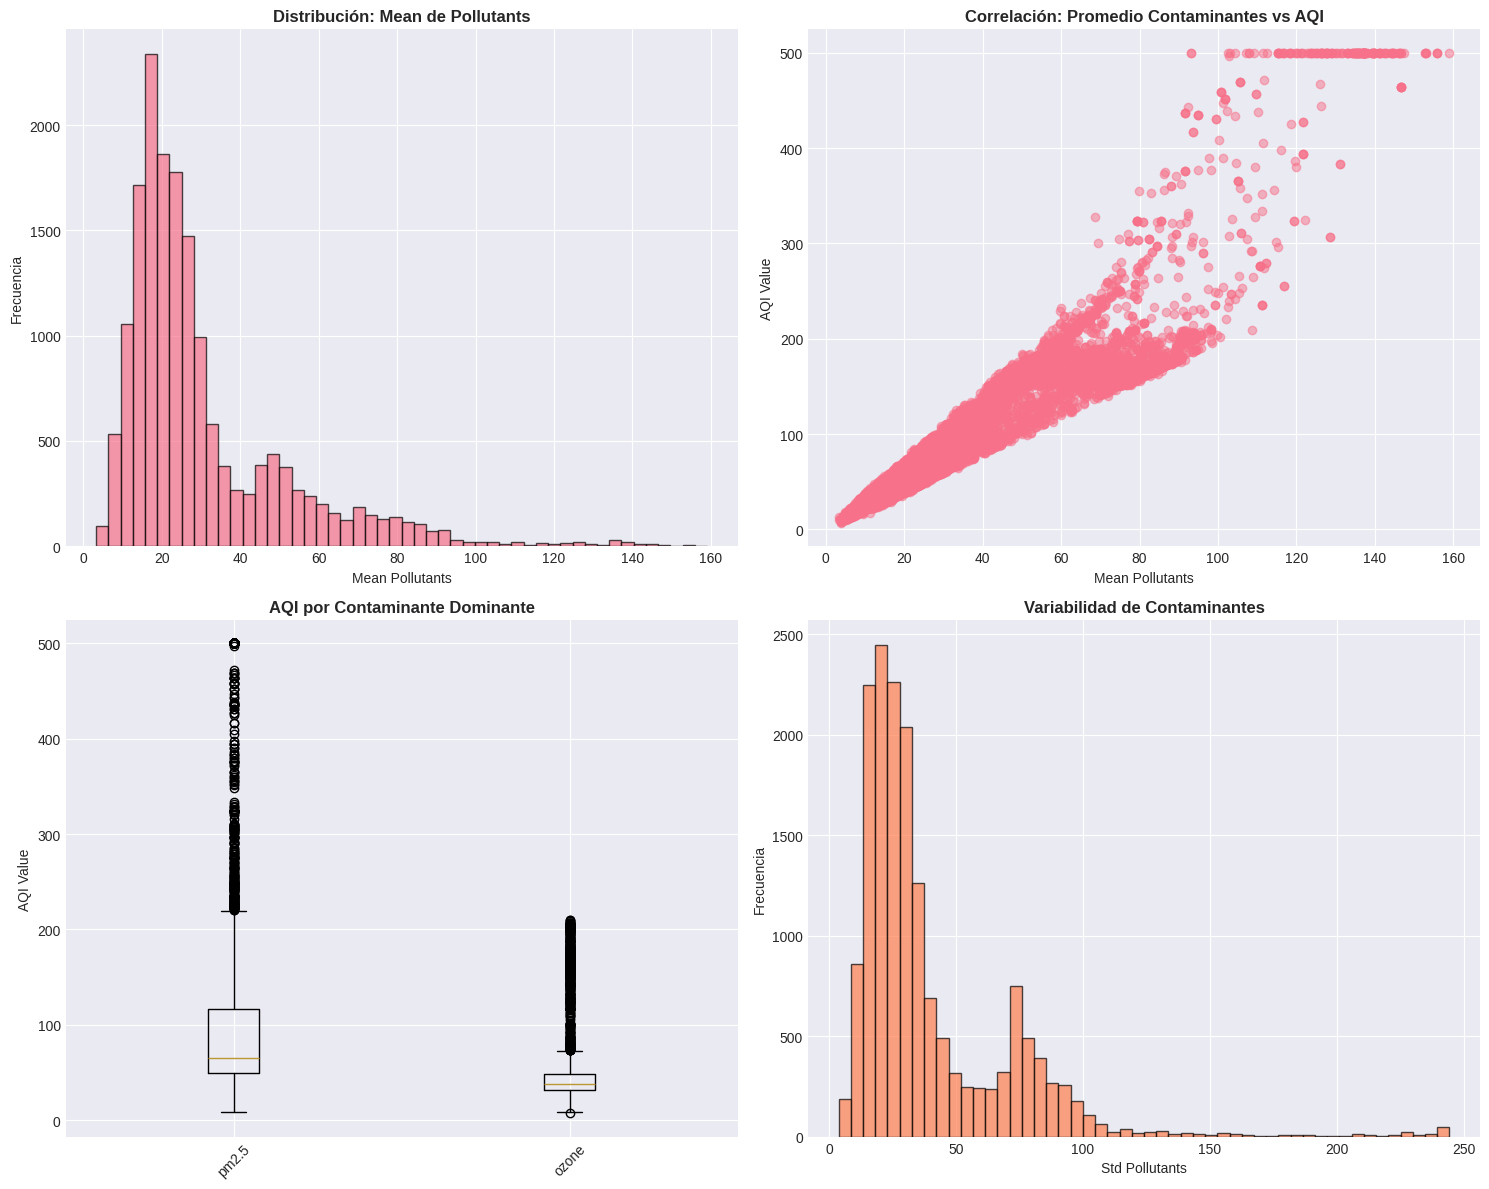

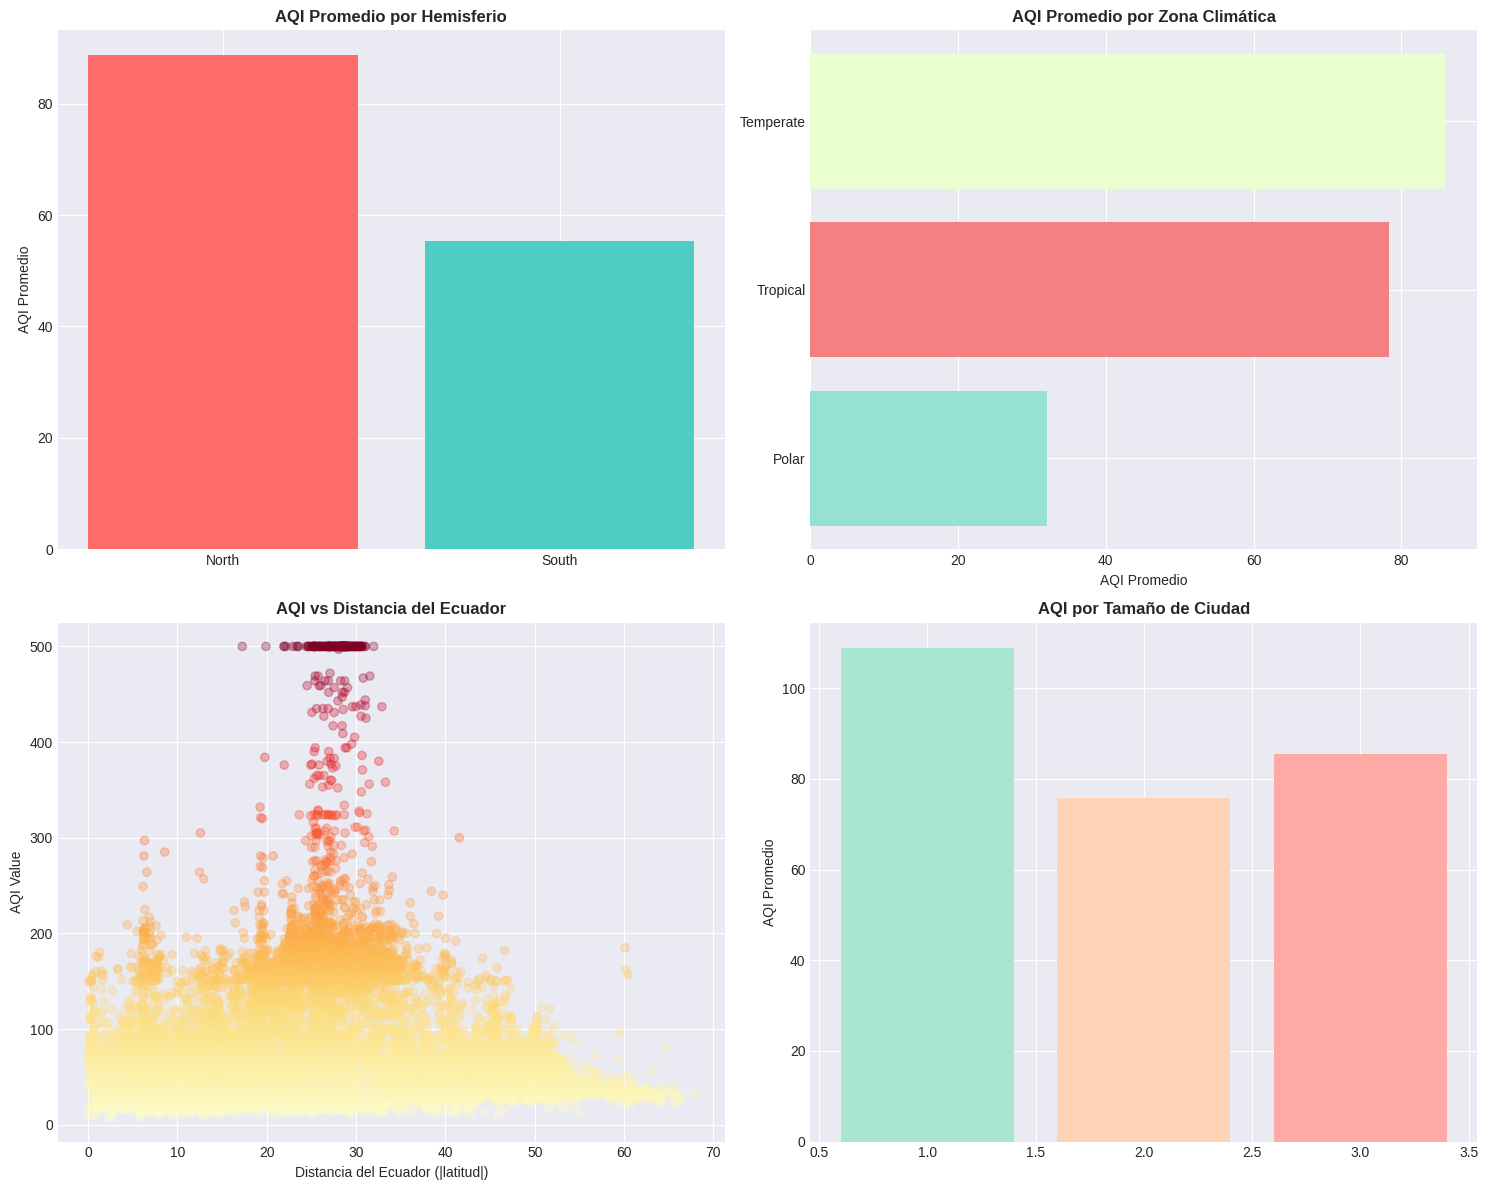

********************************************************************************

Correlación de algunas features con AQI
********************************************************************************
city_name_encoded             1.000000
range_pollutants              0.995741
std_pollutants                0.992079
mean_pollutants               0.943483
aqi_category_encoded          0.919386
pm2.5_aqi_category_encoded    0.913498
risk_level                    0.884611
is_unhealthy                  0.785082
n_dangerous_pollutants        0.741989
country_mean_aqi              0.675846
dtype: float64


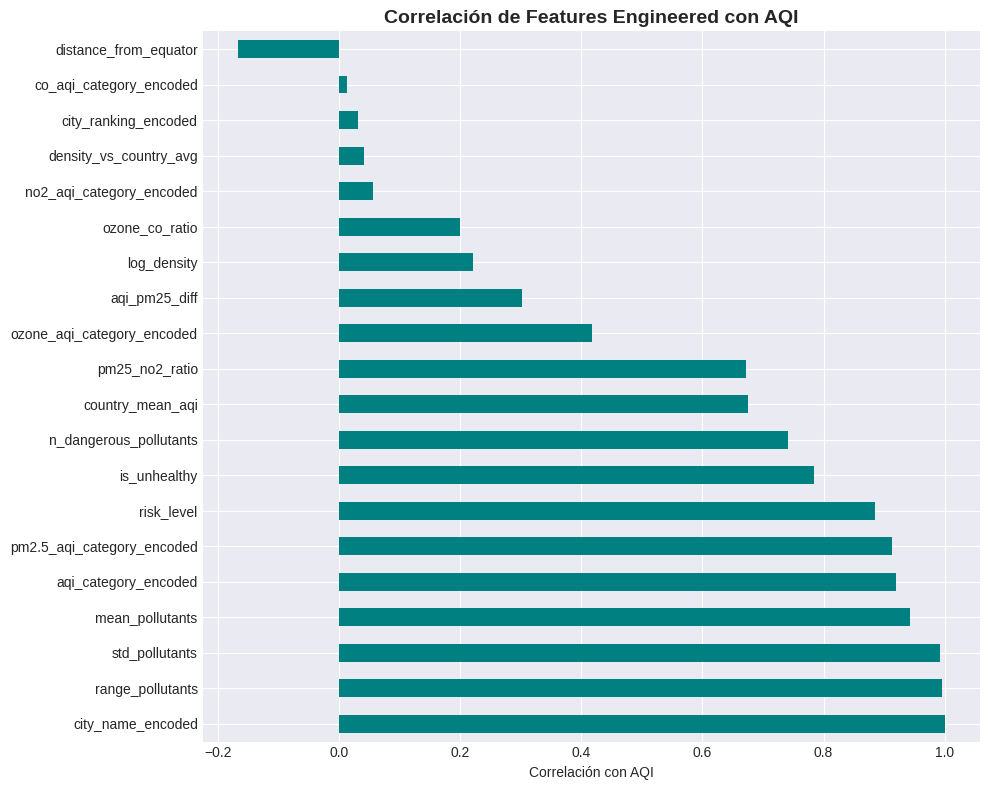

In [313]:
# Visualizar el encoding y transformaciones
print("Visualizaciones de Features")
print("*"*80)

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Figura 1: Distribución de contaminantes combinados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].hist(df['mean_pollutants'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución: Mean de Pollutants', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Mean Pollutants')
axes[0, 0].set_ylabel('Frecuencia')

axes[0, 1].scatter(df['mean_pollutants'], df['aqi_value'], alpha=0.5)
axes[0, 1].set_title('Correlación: Promedio Contaminantes vs AQI', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Mean Pollutants')
axes[0, 1].set_ylabel('AQI Value')

axes[1, 0].boxplot([df[df['dominant_pollutant']==pol]['aqi_value'].dropna()
                    for pol in df['dominant_pollutant'].unique()])
axes[1, 0].set_title('AQI por Contaminante Dominante', fontsize=12, fontweight='bold')
axes[1, 0].set_xticklabels(df['dominant_pollutant'].unique(), rotation=45)
axes[1, 0].set_ylabel('AQI Value')

axes[1, 1].hist(df['std_pollutants'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1, 1].set_title('Variabilidad de Contaminantes', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Std Pollutants')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig('features_contaminantes.png', dpi=300, bbox_inches='tight')
plt.show()

# Figura 2: Features geográficas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

hemisphere_aqi = df.groupby('hemisphere')['aqi_value'].mean()
axes[0, 0].bar(hemisphere_aqi.index, hemisphere_aqi.values, color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('AQI Promedio por Hemisferio', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('AQI Promedio')

zone_aqi = df.groupby('climate_zone')['aqi_value'].mean().sort_values()
axes[0, 1].barh(zone_aqi.index, zone_aqi.values, color=['#95E1D3', '#F38181', '#EAFFD0'])
axes[0, 1].set_title('AQI Promedio por Zona Climática', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('AQI Promedio')

axes[1, 0].scatter(df['distance_from_equator'], df['aqi_value'], alpha=0.3, c=df['aqi_value'], cmap='YlOrRd')
axes[1, 0].set_title('AQI vs Distancia del Ecuador', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Distancia del Ecuador (|latitud|)')
axes[1, 0].set_ylabel('AQI Value')

city_size_aqi = df.groupby('city_ranking_encoded')['aqi_value'].mean()
axes[1, 1].bar(city_size_aqi.index, city_size_aqi.values, color=['#A8E6CF', '#FFD3B6', '#FFAAA5', '#FF8B94'])
axes[1, 1].set_title('AQI por Tamaño de Ciudad', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('AQI Promedio')

plt.tight_layout()
plt.savefig('features_geograficas.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlación de nuevas features con AQI
numeric_new_features = df[new_features].select_dtypes(include=[np.number]).columns
correlations = df[numeric_new_features].corrwith(df['aqi_value']).sort_values(ascending=False)

print("*"*80)
print("\nCorrelación de algunas features con AQI")
print("*"*80)

print(correlations.head(10))

# Figura de correlaciones
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='teal')
plt.title('Correlación de Features Engineered con AQI', fontsize=14, fontweight='bold')
plt.xlabel('Correlación con AQI')
plt.tight_layout()
plt.savefig('correlation_engineered_features.png', dpi=300, bbox_inches='tight')
plt.show()

#**Normalización**

Ahora que tenemos muchas features o variables nuevas y derivadas, tanto de nuevos datasets combinados o con matemáticas y funciones simples geográficas, procedemos a Normalizarlas.





In [314]:
# Cargar datos con features engineered
df = pd.read_csv('main_df_engineered.csv')

**Análisis de Distribuciones de Variables Numéricas**

In [315]:
numeric_features = df.select_dtypes(include=[np.number])
categoric_features = df.select_dtypes(include=['object'])
print("*" * 60)
print(f"Total de variables numéricas: {numeric_features.shape[1]}")
print(f"Total de variables categóricas: {categoric_features.shape[1]}")
print("*" * 60)

************************************************************
Total de variables numéricas: 29
Total de variables categóricas: 11
************************************************************


In [316]:
# Calcular skewness (asimetría) para cada variable
skewness_dict = {}
for col in numeric_features:
    if col in df.columns:
        skew = df[col].skew()
        skewness_dict[col] = skew

skewness_df = pd.DataFrame.from_dict(skewness_dict, orient='index', columns=['Skewness'])
skewness_df = skewness_df.sort_values('Skewness', key=abs, ascending=False)

print("   (|skewness| > 1 indica alta asimetría, requiere transformación)\n")
print(skewness_df)

   (|skewness| > 1 indica alta asimetría, requiere transformación)

                              Skewness
co_aqi_category_encoded     129.456556
no2_aqi_category_encoded     45.741119
co_aqi_value                  9.235257
density                       8.738176
density_vs_country_avg        7.192716
aqi_pm25_diff                 5.111219
no2_aqi_value                 4.637202
pm25_no2_ratio                3.379529
ozone_aqi_category_encoded    3.135635
city_name_encoded             2.883345
aqi_value                     2.883345
range_pollutants              2.624504
ozone_aqi_value               2.613056
std_pollutants                2.597372
pm2.5_aqi_value               2.537268
mean_pollutants               2.030006
n_dangerous_pollutants        1.685921
ranking                      -1.233530
city_ranking_encoded         -1.233530
is_unhealthy                  1.133544
pm2.5_aqi_category_encoded    1.118273
aqi_category_encoded          1.102348
risk_level                    0.938

In [317]:
# Clasificar variables por nivel de asimetría
highly_skewed = skewness_df[abs(skewness_df['Skewness']) > 1].index.tolist()
moderately_skewed = skewness_df[(abs(skewness_df['Skewness']) > 0.5) &
                                 (abs(skewness_df['Skewness']) <= 1)].index.tolist()
normal_dist = skewness_df[abs(skewness_df['Skewness']) <= 0.5].index.tolist()


print(f"\nVariables altamente sesgadas (|skew| > 1): {len(highly_skewed)}")
print("*" * 60)
for var in highly_skewed[:5]:
    print(f"   - {var}: {skewness_df.loc[var, 'Skewness']:.3f}")

print(f"\nVariables moderadamente sesgadas (0.5 < |skew| ≤ 1): {len(moderately_skewed)}")
print("*" * 60)
for var in moderately_skewed[:5]:
    print(f"   - {var}: {skewness_df.loc[var, 'Skewness']:.3f}")

print(f"\n*Variables con distribución aproximadamente normal (|skew| ≤ 0.5): {len(normal_dist)}")



Variables altamente sesgadas (|skew| > 1): 22
************************************************************
   - co_aqi_category_encoded: 129.457
   - no2_aqi_category_encoded: 45.741
   - co_aqi_value: 9.235
   - density: 8.738
   - density_vs_country_avg: 7.193

Variables moderadamente sesgadas (0.5 < |skew| ≤ 1): 4
************************************************************
   - risk_level: 0.938
   - country_mean_aqi: 0.840
   - lat: -0.742
   - ozone_co_ratio: 0.627

*Variables con distribución aproximadamente normal (|skew| ≤ 0.5): 3


## **Transformaciones de Normalización**

In [318]:
# Crear DataFrame para transformaciones
df_transformed = df.copy()

# Transformación LOGARÍTMICA para variables altamente sesgadas positivas
print("\n Transformación Logarítmica (para alta asimetría positiva):")
print("   Justificación: Reduce asimetría en variables con valores concentrados en rangos bajos\n")

log_candidates = ['density', 'range_pollutants', 'std_pollutants', 'pm25_no2_ratio',
                  'ozone_co_ratio', 'density_vs_country_avg']

for col in log_candidates:
    if col in df.columns and col in highly_skewed:
        # Verificar que todos los valores sean positivos
        if (df[col] >= 0).all():
            df_transformed[f'{col}_log'] = np.log1p(df[col])  # log1p = log(1+x)
            print(f"   *{col} → {col}_log")
            print(f"      Skewness antes: {df[col].skew():.3f} | después: {df_transformed[f'{col}_log'].skew():.3f}")

# Transformación YEO-JOHNSON (maneja valores negativos y ceros)
print("\nTransformación Yeo-Johnson (para variables con valores negativos/ceros):")
print("   Justificación: Generalización de Box-Cox que funciona con valores ≤ 0\n")



 Transformación Logarítmica (para alta asimetría positiva):
   Justificación: Reduce asimetría en variables con valores concentrados en rangos bajos

   *density → density_log
      Skewness antes: 8.738 | después: -0.401
   *range_pollutants → range_pollutants_log
      Skewness antes: 2.625 | después: 0.424
   *std_pollutants → std_pollutants_log
      Skewness antes: 2.597 | después: 0.493
   *pm25_no2_ratio → pm25_no2_ratio_log
      Skewness antes: 3.380 | después: 0.400
   *density_vs_country_avg → density_vs_country_avg_log
      Skewness antes: 7.193 | después: 1.677

Transformación Yeo-Johnson (para variables con valores negativos/ceros):
   Justificación: Generalización de Box-Cox que funciona con valores ≤ 0



In [319]:
# Variables que pueden tener valores negativos o ceros
yeo_johnson_vars = ['aqi_pm25_diff', 'lat', 'lng']

pt_yeo = PowerTransformer(method='yeo-johnson', standardize=False)

for col in yeo_johnson_vars:
    if col in df.columns:
        df_transformed[f'{col}_yj'] = pt_yeo.fit_transform(df[[col]])
        print(f"   *{col} → {col}_yj")
        print(f"      Skewness antes: {df[col].skew():.3f} | después: {df_transformed[f'{col}_yj'].skew():.3f}")

# 3.2.3 Transformación BOX-COX (solo para valores estrictamente positivos)
print("\n Transformación Box-Cox (para valores estrictamente positivos):")
print("   Justificación: Encuentra la transformación óptima (λ) para normalizar\n")

box_cox_vars = ['aqi_value', 'co_aqi_value', 'ozone_aqi_value',
                'no2_aqi_value', 'pm2.5_aqi_value', 'mean_pollutants']

pt_box = PowerTransformer(method='box-cox', standardize=False)

for col in box_cox_vars:
    if col in df.columns:
        # Box-Cox requiere valores > 0
        if (df[col] > 0).all():
            df_transformed[f'{col}_bc'] = pt_box.fit_transform(df[[col]])
            print(f"   *{col} → {col}_bc")
            print(f"      Skewness antes: {df[col].skew():.3f} | después: {df_transformed[f'{col}_bc'].skew():.3f}")


   *aqi_pm25_diff → aqi_pm25_diff_yj
      Skewness antes: 5.111 | después: 1.455
   *lat → lat_yj
      Skewness antes: -0.742 | después: -0.391
   *lng → lng_yj
      Skewness antes: -0.184 | después: 0.036

 Transformación Box-Cox (para valores estrictamente positivos):
   Justificación: Encuentra la transformación óptima (λ) para normalizar

   *aqi_value → aqi_value_bc
      Skewness antes: 2.883 | después: 0.013
   *mean_pollutants → mean_pollutants_bc
      Skewness antes: 2.030 | después: 0.002


In [320]:
# Variables originales numéricas
original_numeric = ['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value',
                   'pm2.5_aqi_value', 'density', 'lat', 'lng', 'ranking']

# Obtener solo las columnas nuevas (features ingenierizadas)
engineered_numeric = list(set(numeric_features) - set(original_numeric))

# (Opcional) ordenar por nombre si lo deseas
engineered_numeric.sort()

# Ver resultado
print("Variables numéricas ingenierizadas:", engineered_numeric)

Variables numéricas ingenierizadas: ['aqi_category_encoded', 'aqi_pm25_diff', 'city_name_encoded', 'city_ranking_encoded', 'co_aqi_category_encoded', 'country_mean_aqi', 'density_vs_country_avg', 'distance_from_equator', 'is_unhealthy', 'log_density', 'mean_pollutants', 'n_dangerous_pollutants', 'no2_aqi_category_encoded', 'ozone_aqi_category_encoded', 'ozone_co_ratio', 'pm2.5_aqi_category_encoded', 'pm25_no2_ratio', 'range_pollutants', 'risk_level', 'std_pollutants']


## **Escalamiento de Variables**

In [321]:
# Variables transformadas
transformed_vars = [col for col in df_transformed.columns if col.endswith(('_log', '_yj', '_bc', '_sqrt'))]

all_to_scale = original_numeric + engineered_numeric + transformed_vars
all_to_scale = [col for col in all_to_scale if col in df_transformed.columns]

# StandardScaler (Estandarización)
print("\n StandardScaler (Estandarización: media=0, std=1):")
print("   Justificación: Para algoritmos sensibles a escala (SVM, KNN, Redes Neuronales)")
print("   Asume distribución gaussiana\n")

scaler_standard = StandardScaler()
df_standard = df_transformed.copy()
df_standard[all_to_scale] = scaler_standard.fit_transform(df_transformed[all_to_scale])

print(f"   *{len(all_to_scale)} variables estandarizadas")
print(f"\n   Estadísticas después de estandarización:")
print(df_standard[all_to_scale[:5]].describe().loc[['mean', 'std']])

# MinMaxScaler (Normalización 0-1)
print("\nMinMaxScaler (Normalización a rango [0,1]):")
print("   Justificación: Para algoritmos que requieren datos acotados (Redes Neuronales)")
print("   Preserva la forma de la distribución original\n")

scaler_minmax = MinMaxScaler()
df_minmax = df_transformed.copy()
df_minmax[all_to_scale] = scaler_minmax.fit_transform(df_transformed[all_to_scale])

print(f"   *{len(all_to_scale)} variables normalizadas a [0,1]")
print(f"\n    Rango después de normalización:")
print(df_minmax[all_to_scale[:5]].describe().loc[['min', 'max']])

# RobustScaler (Escalado robusto a outliers)
print("\n RobustScaler (Escalado con mediana e IQR):")
print("     Justificación: Robusto a outliers, usa mediana y rango intercuartil")
print("     Ideal cuando hay valores extremos\n")

scaler_robust = RobustScaler()
df_robust = df_transformed.copy()
df_robust[all_to_scale] = scaler_robust.fit_transform(df_transformed[all_to_scale])

print(f"   *{len(all_to_scale)} variables escaladas con RobustScaler")
print(f"\n    Estadísticas después de escalado robusto:")
print(df_robust[all_to_scale[:5]].describe().loc[['50%']])  # mediana


 StandardScaler (Estandarización: media=0, std=1):
   Justificación: Para algoritmos sensibles a escala (SVM, KNN, Redes Neuronales)
   Asume distribución gaussiana

   *39 variables estandarizadas

   Estadísticas después de estandarización:
         aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  \
mean -8.225150e-17 -5.214915e-17    -4.939330e-17   2.692253e-17   
std   1.000030e+00  1.000030e+00     1.000030e+00   1.000030e+00   

      pm2.5_aqi_value  
mean    -3.391814e-18  
std      1.000030e+00  

MinMaxScaler (Normalización a rango [0,1]):
   Justificación: Para algoritmos que requieren datos acotados (Redes Neuronales)
   Preserva la forma de la distribución original

   *39 variables normalizadas a [0,1]

    Rango después de normalización:
     aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  pm2.5_aqi_value
min        0.0           0.0              0.0            0.0              0.0
max        1.0           1.0              1.0            1.0           

## **Comparación de Métodos de Escalamiento**

In [322]:
# Crear tabla comparativa MEJORADA
comparison_data = []
test_vars = ['aqi_value', 'density', 'mean_pollutants']

for var in test_vars:
    if var in df_transformed.columns:
        comparison_data.append({
            'Variable': var,

            # Estadísticas ORIGINALES
            'Original_Mean': df_transformed[var].mean(),
            'Original_Std': df_transformed[var].std(),
            'Original_Min': df_transformed[var].min(),
            'Original_Max': df_transformed[var].max(),
            'Original_Range': df_transformed[var].max() - df_transformed[var].min(),

            # StandardScaler (debería tener mean≈0, std=1)
            'Standard_Mean': df_standard[var].mean(),
            'Standard_Std': df_standard[var].std(),
            'Standard_Range': df_standard[var].max() - df_standard[var].min(),

            # MinMaxScaler (debería tener min=0, max=1)
            'MinMax_Mean': df_minmax[var].mean(),
            'MinMax_Std': df_minmax[var].std(),
            'MinMax_Range': 1.0,  # Siempre 1 (max-min = 1-0)

            # RobustScaler (usa mediana e IQR)
            'Robust_Mean': df_robust[var].mean(),
            'Robust_Median': df_robust[var].median(),
            'Robust_IQR': df_robust[var].quantile(0.75) - df_robust[var].quantile(0.25),
            'Robust_Range': df_robust[var].max() - df_robust[var].min(),
        })

comparison_df = pd.DataFrame(comparison_data)

# Tabla 1: Comparación de Medias
print("\nTABLA 1: COMPARACIÓN DE MEDIAS Y DESVIACIONES")
print("="*100)
tabla1 = comparison_df[['Variable', 'Original_Mean', 'Original_Std',
                        'Standard_Mean', 'Standard_Std',
                        'MinMax_Mean', 'MinMax_Std',
                        'Robust_Mean']].round(4)
print(tabla1.to_string(index=False))

# Tabla 2: Comparación de Rangos
print("\nTABLA 2: COMPARACIÓN DE RANGOS (Min-Max)")
print("="*100)
tabla2 = comparison_df[['Variable', 'Original_Min', 'Original_Max', 'Original_Range',
                        'Standard_Range', 'MinMax_Range', 'Robust_Range']].round(4)
print(tabla2.to_string(index=False))

# Tabla 3: Características especiales de cada método
print("\nTABLA 3: VERIFICACIÓN DE PROPIEDADES DE ESCALAMIENTO")
print("="*100)

verification_data = []
for var in test_vars:
    if var in df_transformed.columns:
        verification_data.append({
            'Variable': var,
            'Standard: mean≈0?': '*' if abs(df_standard[var].mean()) < 0.01 else 'X',
            'Standard: std≈1?': '*' if abs(df_standard[var].std() - 1) < 0.01 else 'X',
            'MinMax: min=0?': '*' if abs(df_minmax[var].min()) < 0.01 else 'X',
            'MinMax: max=1?': '*' if abs(df_minmax[var].max() - 1) < 0.01 else 'X',
            'Robust: median≈0?': '*' if abs(df_robust[var].median()) < 0.01 else 'X',
        })

verification_df = pd.DataFrame(verification_data)
print(verification_df.to_string(index=False))




TABLA 1: COMPARACIÓN DE MEDIAS Y DESVIACIONES
       Variable  Original_Mean  Original_Std  Standard_Mean  Standard_Std  MinMax_Mean  MinMax_Std  Robust_Mean
      aqi_value        83.1467       69.2030           -0.0           1.0       0.1545      0.1404       0.3895
        density      1550.0624     3407.7638            0.0           1.0       0.0176      0.0388       0.8057
mean_pollutants        30.4681       21.6898           -0.0           1.0       0.1748      0.1393       0.3850

TABLA 2: COMPARACIÓN DE RANGOS (Min-Max)
       Variable  Original_Min  Original_Max  Original_Range  Standard_Range  MinMax_Range  Robust_Range
      aqi_value          7.00         500.0          493.00          7.1242           1.0        7.9516
        density          0.00       87857.0        87857.00         25.7822           1.0       70.2378
mean_pollutants          3.25         159.0          155.75          7.1810           1.0        8.3067

TABLA 3: VERIFICACIÓN DE PROPIEDADES DE ESCALA

In [323]:
print("\nGuardando Datasets Procesados...")
print("-" * 60)

# Guardar versiones diferentes
df_transformed.to_csv('data_transformed.csv', index=False)
df_standard.to_csv('data_standardized.csv', index=False)
df_minmax.to_csv('data_normalized.csv', index=False)
df_robust.to_csv('data_robust_scaled.csv', index=False)

print("*Datasets guardados:")
print("   1. data_transformed.csv - Con transformaciones (log, Box-Cox, Yeo-Johnson)")
print("   2. data_standardized.csv - Estandarizado (StandardScaler)")
print("   3. data_normalized.csv - Normalizado a [0,1] (MinMaxScaler)")
print("   4. data_robust_scaled.csv - Escalado robusto (RobustScaler)")


Guardando Datasets Procesados...
------------------------------------------------------------
*Datasets guardados:
   1. data_transformed.csv - Con transformaciones (log, Box-Cox, Yeo-Johnson)
   2. data_standardized.csv - Estandarizado (StandardScaler)
   3. data_normalized.csv - Normalizado a [0,1] (MinMaxScaler)
   4. data_robust_scaled.csv - Escalado robusto (RobustScaler)


In [324]:
print(f"\n*Variables transformadas con LOGARITMO: {len([c for c in df_transformed.columns if c.endswith('_log')])}")
print(f"*Variables transformadas con YEO-JOHNSON: {len([c for c in df_transformed.columns if c.endswith('_yj')])}")
print(f"*Variables transformadas con BOX-COX: {len([c for c in df_transformed.columns if c.endswith('_bc')])}")
print(f"*Variables transformadas con RAÍZ CUADRADA: {len([c for c in df_transformed.columns if c.endswith('_sqrt')])}")
print(f"\n*Total de variables escaladas: {len(all_to_scale)}")
print(f"Métodos de escalamiento aplicados: StandardScaler, MinMaxScaler, RobustScaler")

# Crear un dataset "final" recomendado
df_standard.to_csv('data_final_for_modeling.csv', index=False)


*Variables transformadas con LOGARITMO: 5
*Variables transformadas con YEO-JOHNSON: 3
*Variables transformadas con BOX-COX: 2
*Variables transformadas con RAÍZ CUADRADA: 0

*Total de variables escaladas: 39
Métodos de escalamiento aplicados: StandardScaler, MinMaxScaler, RobustScaler




> Después de este análisis y escalamiento, se ha decidido usar el **StandardScaler**. Ya que haremos un análisis de PCA creemos que un standard scaler provee la estandarización necesaria para análisis de componentes. Ya que por el momento no usaremos modelos lineales ni redes neuronales (minMaxScaler).



#**Selección y Extracción**

Esta sección es importante para reducir dimensionalidad y quedarnos con las features más relevantes.



In [325]:
# Cargar datos transformados
df = pd.read_csv('data_final_for_modeling.csv')
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,...,density_log,range_pollutants_log,std_pollutants_log,pm25_no2_ratio_log,density_vs_country_avg_log,aqi_pm25_diff_yj,lat_yj,lng_yj,aqi_value_bc,mean_pollutants_bc
0,Brazil,Presidente Dutra,-0.609049,Good,-0.257657,Good,-1.010310,Good,-0.331432,Good,...,-1.255691,-0.727799,-0.752608,-0.282983,-0.957823,-0.511880,-1.334752,-1.168113,-0.678326,-1.281665
1,Italy,Priolo Gargallo,-0.247782,Moderate,-0.257657,Good,0.014283,Good,-0.093349,Good,...,-0.533136,0.005820,-0.018790,-0.207401,-0.632852,-0.511880,0.519835,-0.294279,0.092687,0.189193
2,Poland,Przasnysz,-0.710203,Good,-0.257657,Good,-0.136393,Good,-0.569514,Good,...,0.189699,-0.971614,-1.012510,-0.309354,0.069392,2.018896,1.319982,-0.198373,-1.006393,-1.015824
3,Germany,Puttlingen,-0.305584,Moderate,-0.257657,Good,-0.106258,Good,0.144733,Good,...,0.273498,-0.090521,-0.141202,-0.579626,0.546336,-0.511880,1.129129,-0.431913,-0.003628,0.077467
4,Belgium,Puurs,-0.276683,Moderate,-0.257657,Good,-0.287068,Good,1.097063,Good,...,0.047785,-0.041598,-0.169600,-1.258928,0.080202,-0.511880,1.220610,-0.474303,0.045462,0.077467


In [326]:
print(f"\nDataset cargado: data_final_for_modeling.csv (ESTANDARIZADO)")
print(f"   - Total de features: {df.shape[1]}")
print(f"   - Total de observaciones: {df.shape[0]}")
print(f"   *IMPORTANTE: Este dataset ya está escalado con StandardScaler")



Dataset cargado: data_final_for_modeling.csv (ESTANDARIZADO)
   - Total de features: 50
   - Total de observaciones: 16759
   *IMPORTANTE: Este dataset ya está escalado con StandardScaler


In [327]:
# Definir variable objetivo
target = 'aqi_value'

# Columnas a excluir (target + identificadores + categóricas NO codificadas)
columns_to_exclude = [
    target,
    'country_name', 'city_name',  # Identificadores
    'aqi_category', 'co_aqi_category', 'ozone_aqi_category',  # Categóricas originales
    'no2_aqi_category', 'pm2.5_aqi_category',
    'dominant_pollutant', 'hemisphere', 'climate_zone', 'longitude_zone'  # Categóricas engineered
]

# Eliminar columnas que existan
columns_to_exclude_existing = [col for col in columns_to_exclude if col in df.columns]

print(f"\nColumnas categóricas/identificadores a excluir: {len(columns_to_exclude_existing)}")
for col in columns_to_exclude_existing:
    print(f"   - {col}")

# Seleccionar SOLO columnas numéricas (método robusto)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Eliminar el target de las features numéricas
if target in numeric_columns:
    numeric_columns.remove(target)

print(f"\nColumnas numéricas detectadas: {len(numeric_columns)}")

# Crear X y y
X = df[numeric_columns].copy()
y = df[target].copy()


print(f"\n*Dataset para selección de features:")
print(f"   - Total de features: {X.shape[1]}")
print(f"   - Total de observaciones: {X.shape[0]}")
print(f"   - Variable objetivo: {target}")


Columnas categóricas/identificadores a excluir: 12
   - aqi_value
   - country_name
   - city_name
   - aqi_category
   - co_aqi_category
   - ozone_aqi_category
   - no2_aqi_category
   - pm2.5_aqi_category
   - dominant_pollutant
   - hemisphere
   - climate_zone
   - longitude_zone

Columnas numéricas detectadas: 38

*Dataset para selección de features:
   - Total de features: 38
   - Total de observaciones: 16759
   - Variable objetivo: aqi_value


## **Filtrado por Umbral de Varianza**

In [328]:
#Features con varianza cercana a 0 no aportan información
#Eliminar features con varianza < 0.01 (casi constantes)

# Calcular varianza de cada feature
variances = X.var().sort_values(ascending=True)
print("Varianza de Features (10 con menor varianza):")
print(variances.head(10))

# Aplicar umbral de varianza
variance_threshold = 0.01
selector_variance = VarianceThreshold(threshold=variance_threshold)
X_variance_filtered = selector_variance.fit_transform(X)

# Features eliminadas
low_variance_features = X.columns[~selector_variance.get_support()].tolist()
retained_variance_features = X.columns[selector_variance.get_support()].tolist()

print(f"\n*Features eliminadas por baja varianza (< {variance_threshold}): {len(low_variance_features)}")
for feat in low_variance_features:
    print(f"   - {feat}: varianza = {variances[feat]:.6f}")

print(f"\n*Features retenidas: {len(retained_variance_features)}")
print(f"   Reducción: {len(low_variance_features)} features eliminadas")


Varianza de Features (10 con menor varianza):
aqi_category_encoded        1.00006
co_aqi_category_encoded     1.00006
aqi_pm25_diff               1.00006
n_dangerous_pollutants      1.00006
no2_aqi_category_encoded    1.00006
country_mean_aqi            1.00006
no2_aqi_value               1.00006
aqi_pm25_diff_yj            1.00006
co_aqi_value                1.00006
ozone_co_ratio              1.00006
dtype: float64

*Features eliminadas por baja varianza (< 0.01): 0

*Features retenidas: 38
   Reducción: 0 features eliminadas


## **Análisis de Correlación**
Eliminar features redundantes (altamente correlacionadas entre sí)

In [329]:
# Calcular correlación con target
correlations_with_target = X[retained_variance_features].corrwith(y).abs().sort_values(ascending=False)

print("Top 15 features relacionadas a AQI:")
print(correlations_with_target.head(15))

# Umbral de correlación mínima con target
min_corr_threshold = 0.1
highly_correlated_with_target = correlations_with_target[correlations_with_target > min_corr_threshold].index.tolist()

print(f"\n*Features con correlación |r| > {min_corr_threshold} con AQI: {len(highly_correlated_with_target)}")
print(f"*Features con baja correlación |r| ≤ {min_corr_threshold}: {len(correlations_with_target[correlations_with_target <= min_corr_threshold])}")

# Multicolinealidad entre Features
print("\nDetección de Multicolinealidad entre Features:")
print("   Justificación: Eliminar features redundantes (altamente correlacionadas entre sí)\n")

# Matriz de correlación entre features
correlation_matrix = X[retained_variance_features].corr().abs()

# Encontrar pares de features con alta correlación
high_corr_threshold = 0.90
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

high_corr_pairs = []
for column in upper_triangle.columns:
    high_corr_features = upper_triangle.index[upper_triangle[column] > high_corr_threshold].tolist()
    for feat in high_corr_features:
        high_corr_pairs.append((column, feat, correlation_matrix.loc[column, feat]))


print(f"*Pares de features con correlación > {high_corr_threshold} (multicolinealidad):")
if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs[:10]:  # Mostrar primeros 10
        print(f"   - {feat1} ↔ {feat2}: r = {corr:.3f}")

    # Decidir cuál eliminar (mantener la que tiene mayor correlación con target)
    features_to_drop_corr = set()
    for feat1, feat2, corr in high_corr_pairs:
        corr_feat1 = abs(X[feat1].corr(y))
        corr_feat2 = abs(X[feat2].corr(y))

        if corr_feat1 > corr_feat2:
            features_to_drop_corr.add(feat2)
        else:
            features_to_drop_corr.add(feat1)

    print(f"\n*Features a eliminar por multicolinealidad: {len(features_to_drop_corr)}")
    for feat in list(features_to_drop_corr)[:10]:
        print(f"   - {feat}")
else:
    features_to_drop_corr = set()
    print("   *No se encontraron pares con correlación muy alta")

# Features después de filtrado por correlación
features_after_correlation = [f for f in retained_variance_features
                               if f not in features_to_drop_corr and f in highly_correlated_with_target]

print(f"\n*Features retenidas después de análisis de correlación: {len(features_after_correlation)}")


Top 15 features relacionadas a AQI:
city_name_encoded             1.000000
range_pollutants              0.995741
std_pollutants                0.992079
pm2.5_aqi_value               0.987744
mean_pollutants               0.943483
aqi_category_encoded          0.919386
pm2.5_aqi_category_encoded    0.913498
std_pollutants_log            0.896756
range_pollutants_log          0.893424
risk_level                    0.884611
aqi_value_bc                  0.850929
mean_pollutants_bc            0.824236
is_unhealthy                  0.785082
n_dangerous_pollutants        0.741989
country_mean_aqi              0.675846
dtype: float64

*Features con correlación |r| > 0.1 con AQI: 28
*Features con baja correlación |r| ≤ 0.1: 10

Detección de Multicolinealidad entre Features:
   Justificación: Eliminar features redundantes (altamente correlacionadas entre sí)

*Pares de features con correlación > 0.9 (multicolinealidad):
   - mean_pollutants ↔ pm2.5_aqi_value: r = 0.937
   - std_pollutants ↔ pm



> Ya que city_name_encoded esta derivada directamente de AQI la correlación sale 1.0



## **Test Chi-Cuadrado para Features Categóricas**
medir dependencia entre features categóricas y el target

In [330]:
# Discretizar target en categorías AQI
y_categorical = pd.cut(y, bins=[0, 50, 100, 150, 200, 500],
                       labels=['Good', 'Moderate', 'Unhealthy_Sensitive', 'Unhealthy', 'Very_Unhealthy'])

# Features categóricas codificadas (que ya son numéricas pero representan categorías)
categorical_features = [
    'aqi_category_encoded', 'co_aqi_category_encoded',
    'ozone_aqi_category_encoded', 'no2_aqi_category_encoded',
    'pm2.5_aqi_category_encoded', 'risk_level', 'is_unhealthy',
    'n_dangerous_pollutants', 'city_ranking_encoded'
]

categorical_features = [f for f in categorical_features if f in X.columns]

if len(categorical_features) > 0:
    # Label encoder para target categórico
    le = LabelEncoder()
    y_cat_encoded = le.fit_transform(y_categorical.astype(str))

    # Aplicar Chi-cuadrado
    chi2_selector = SelectKBest(chi2, k='all')
    X_cat = X[categorical_features].fillna(0).abs()  # Chi2 requiere valores no negativos
    chi2_selector.fit(X_cat, y_cat_encoded)

    # Obtener scores
    chi2_scores = pd.DataFrame({
        'Feature': categorical_features,
        'Chi2_Score': chi2_selector.scores_,
        'P_Value': chi2_selector.pvalues_
    }).sort_values('Chi2_Score', ascending=False)

    print("CHI-CUADRADO (features categóricas):")
    print(chi2_scores.to_string(index=False))

    # Features significativas (p-value < 0.05)
    significant_chi2 = chi2_scores[chi2_scores['P_Value'] < 0.05]['Feature'].tolist()
    print(f"\n*Features categóricas significativas (p < 0.05): {len(significant_chi2)}")
else:
    significant_chi2 = []
    print("      No hay features categóricas codificadas para analizar")


CHI-CUADRADO (features categóricas):
                   Feature  Chi2_Score      P_Value
              is_unhealthy 3609.399198 0.000000e+00
    n_dangerous_pollutants 3360.404177 0.000000e+00
ozone_aqi_category_encoded 2919.417151 0.000000e+00
      aqi_category_encoded 2410.492888 0.000000e+00
                risk_level 2404.895781 0.000000e+00
pm2.5_aqi_category_encoded 2374.274493 0.000000e+00
  no2_aqi_category_encoded  415.102773 2.840537e-92
   co_aqi_category_encoded  146.914430 8.192893e-34
      city_ranking_encoded    2.337524 1.262902e-01

*Features categóricas significativas (p < 0.05): 8


## **Test ANOVA F-statistic para Features Numéricas**
Medir relación entre features numéricas y target categórico, Útil para clasificación; evalúa si grupos tienen medias diferentes

In [331]:
# Features numéricas continuas
numerical_features = [f for f in features_after_correlation
                      if f not in categorical_features]

if len(numerical_features) > 0:
    # Aplicar ANOVA F-test
    anova_selector = SelectKBest(f_classif, k='all')
    X_num = X[numerical_features].fillna(X[numerical_features].mean())
    anova_selector.fit(X_num, y_cat_encoded)

    # Obtener scores
    anova_scores = pd.DataFrame({
        'Feature': numerical_features,
        'F_Score': anova_selector.scores_,
        'P_Value': anova_selector.pvalues_
    }).sort_values('F_Score', ascending=False)

    print("ANOVA F-STATISTIC SCORES (top 15 features numéricas):")
    print(anova_scores.head(15).to_string(index=False))

    # Features significativas
    significant_anova = anova_scores[anova_scores['P_Value'] < 0.05]['Feature'].tolist()
    print(f"\n*Features numéricas significativas (p < 0.05): {len(significant_anova)}/{len(numerical_features)}")
else:
    significant_anova = []


ANOVA F-STATISTIC SCORES (top 15 features numéricas):
              Feature      F_Score       P_Value
    city_name_encoded 22134.308066  0.000000e+00
     country_mean_aqi 16536.023064  0.000000e+00
       pm25_no2_ratio  4642.836388  0.000000e+00
         co_aqi_value  4225.745519  0.000000e+00
   pm25_no2_ratio_log  3550.049550  0.000000e+00
      ozone_aqi_value  3487.322729  0.000000e+00
               lng_yj  2157.110916  0.000000e+00
        no2_aqi_value  1546.194653 1.482197e-323
distance_from_equator  1047.950666 4.754302e-223
          log_density   815.457414 3.592266e-175
       ozone_co_ratio   291.763669  7.265274e-65
        aqi_pm25_diff   136.720898  1.838887e-31

*Features numéricas significativas (p < 0.05): 12/12


## **Información Mutua (Mutual Information)**
Captura relaciones NO LINEALES entre features y target. Ventaja sobre correlación: detecta dependencias complejas

In [332]:
# Calcular mutual information
all_features = features_after_correlation
X_mi = X[all_features].fillna(X[all_features].mean())
mi_scores = mutual_info_classif(X_mi, y_cat_encoded, random_state=42)

mi_df = pd.DataFrame({
    'Feature': all_features,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("MUTUAL INFORMATION SCORES (top 15):")
print(mi_df.head(15).to_string(index=False))

# Features con MI significativa (umbral: > 0.1)
mi_threshold = 0.1
significant_mi = mi_df[mi_df['MI_Score'] > mi_threshold]['Feature'].tolist()
print(f"\n*Features con MI > {mi_threshold}: {len(significant_mi)}")

MUTUAL INFORMATION SCORES (top 15):
              Feature  MI_Score
    city_name_encoded  0.615733
         is_unhealthy  0.429410
   pm25_no2_ratio_log  0.369967
       pm25_no2_ratio  0.364959
     country_mean_aqi  0.283983
               lng_yj  0.257506
distance_from_equator  0.186747
         co_aqi_value  0.177788
       ozone_co_ratio  0.151237
      ozone_aqi_value  0.116533
          log_density  0.079284
        no2_aqi_value  0.049936
        aqi_pm25_diff  0.037431

*Features con MI > 0.1: 10


In [333]:
# Crear conjunto final de features seleccionadas
# Combinar criterios: features que pasen al menos 2 de los filtros
feature_counts = {}

for feat in features_after_correlation:
    count = 0
    if feat in significant_chi2:
        count += 1
    if feat in significant_anova:
        count += 1
    if feat in significant_mi:
        count += 1
    feature_counts[feat] = count

In [334]:
# Features que pasan al menos 2 criterios
selected_features_filtered = [f for f, count in feature_counts.items() if count >= 2]

print(f"\n*Features originales: {X.shape[1]}")
print(f"*Después de varianza: {len(retained_variance_features)}")
print(f"*Después de correlación: {len(features_after_correlation)}")
print(f"*Significativas en Chi²: {len(significant_chi2)}")
print(f"*Significativas en ANOVA: {len(significant_anova)}")
print(f"*Significativas en MI: {len(significant_mi)}")
print(f"\n*******FEATURES SELECCIONADAS (pasan ≥2 criterios): {len(selected_features_filtered)}")

print("\nLista de features seleccionadas:")
for i, feat in enumerate(selected_features_filtered, 1):
    count = feature_counts[feat]
    print(f"   {i}. {feat} (pasó {count} criterios)")

# Guardar features seleccionadas
df_filtered = df[selected_features_filtered + [target]]
df_filtered.to_csv('data_features_selected.csv', index=False)
print(f"\nDataset con features seleccionadas guardado: 'data_features_selected.csv'")


*Features originales: 38
*Después de varianza: 38
*Después de correlación: 13
*Significativas en Chi²: 8
*Significativas en ANOVA: 12
*Significativas en MI: 10

*******FEATURES SELECCIONADAS (pasan ≥2 criterios): 10

Lista de features seleccionadas:
   1. co_aqi_value (pasó 2 criterios)
   2. ozone_aqi_value (pasó 2 criterios)
   3. city_name_encoded (pasó 2 criterios)
   4. pm25_no2_ratio (pasó 2 criterios)
   5. ozone_co_ratio (pasó 2 criterios)
   6. distance_from_equator (pasó 2 criterios)
   7. is_unhealthy (pasó 2 criterios)
   8. country_mean_aqi (pasó 2 criterios)
   9. pm25_no2_ratio_log (pasó 2 criterios)
   10. lng_yj (pasó 2 criterios)

Dataset con features seleccionadas guardado: 'data_features_selected.csv'


## **Extracción de Categorías**
(Reducción de Dimensionalidad)

In [335]:
# Preparar datos para PCA/FA
X_selected = X[selected_features_filtered].fillna(X[selected_features_filtered].mean())

# Estandarizar para PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

print("\nAnálisis de Componentes Principales (PCA):")
print("   Justificación: Reducir dimensionalidad preservando máxima varianza")
print("   Transforma features correlacionadas en componentes independientes\n")

# PCA con todos los componentes
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Varianza explicada por componentes:")
for i in range(min(10, len(explained_variance_ratio))):
    print(f"   PC{i+1}: {explained_variance_ratio[i]:.4f} ({cumulative_variance[i]:.4f} acumulada)")

# Determinar número óptimo de componentes (90% varianza)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\n*Componentes para 90% varianza: {n_components_90}/{len(selected_features_filtered)}")
print(f" *Componentes para 95% varianza: {n_components_95}/{len(selected_features_filtered)}")
print(f"   Reducción: {len(selected_features_filtered) - n_components_90} features eliminadas (90%)")

# PCA final con n componentes óptimos
pca_optimal = PCA(n_components=n_components_90)
X_pca = pca_optimal.fit_transform(X_scaled)

print(f"\n*****PCA FINAL: {n_components_90} componentes (90% varianza explicada)")



Análisis de Componentes Principales (PCA):
   Justificación: Reducir dimensionalidad preservando máxima varianza
   Transforma features correlacionadas en componentes independientes

Varianza explicada por componentes:
   PC1: 0.4360 (0.4360 acumulada)
   PC2: 0.1782 (0.6142 acumulada)
   PC3: 0.1386 (0.7527 acumulada)
   PC4: 0.0809 (0.8337 acumulada)
   PC5: 0.0584 (0.8921 acumulada)
   PC6: 0.0390 (0.9311 acumulada)
   PC7: 0.0266 (0.9577 acumulada)
   PC8: 0.0191 (0.9768 acumulada)
   PC9: 0.0148 (0.9916 acumulada)
   PC10: 0.0084 (1.0000 acumulada)

*Componentes para 90% varianza: 6/10
 *Componentes para 95% varianza: 7/10
   Reducción: 4 features eliminadas (90%)

*****PCA FINAL: 6 componentes (90% varianza explicada)


In [336]:
print("\nFEATURES MÁS IMPORTANTES POR COMPONENTE:")
components_df = pd.DataFrame(
    pca_optimal.components_,
    columns=selected_features_filtered,
    index=[f'PC{i+1}' for i in range(n_components_90)]
)

for i in range(min(3, n_components_90)):  # Mostrar primeros 3 componentes
    print(f"\n   PC{i+1} (explica {explained_variance_ratio[i]:.2%} varianza):")
    top_features = components_df.iloc[i].abs().sort_values(ascending=False).head(5)
    for feat, weight in top_features.items():
        print(f"      - {feat}: {components_df.loc[f'PC{i+1}', feat]:.3f}")



FEATURES MÁS IMPORTANTES POR COMPONENTE:

   PC1 (explica 43.60% varianza):
      - city_name_encoded: 0.404
      - country_mean_aqi: 0.403
      - is_unhealthy: 0.388
      - pm25_no2_ratio: 0.368
      - pm25_no2_ratio_log: 0.363

   PC2 (explica 17.82% varianza):
      - ozone_co_ratio: 0.596
      - distance_from_equator: 0.465
      - co_aqi_value: -0.441
      - ozone_aqi_value: 0.308
      - is_unhealthy: -0.224

   PC3 (explica 13.86% varianza):
      - co_aqi_value: 0.532
      - pm25_no2_ratio_log: -0.431
      - pm25_no2_ratio: -0.429
      - ozone_aqi_value: 0.387
      - distance_from_equator: 0.355


## **Análisis Factorial (FA)**
Identificar factores latentes que explican covarianza

In [337]:
# Determinar número óptimo de factores usando criterio de información
from sklearn.model_selection import cross_val_score

n_factors_range = range(2, min(15, len(selected_features_filtered)))
fa_scores = []

for n in n_factors_range:
    fa = FactorAnalysis(n_components=n, random_state=42)
    try:
        fa.fit(X_scaled)
        # Log-likelihood como score
        score = fa.score(X_scaled)
        fa_scores.append((n, score))
    except:
        continue

fa_scores_df = pd.DataFrame(fa_scores, columns=['N_Factors', 'Log_Likelihood'])
optimal_n_factors = fa_scores_df.loc[fa_scores_df['Log_Likelihood'].idxmax(), 'N_Factors']

print(f"Evaluación de número de factores:")
print(fa_scores_df.to_string(index=False))

print(f"\n*Número óptimo de factores: {int(optimal_n_factors)}")

# Factor Analysis final
fa_optimal = FactorAnalysis(n_components=int(optimal_n_factors), random_state=42)
X_fa = fa_optimal.fit_transform(X_scaled)

print(f"\n****Factor análisis final: {int(optimal_n_factors)} factores")

# Cargas factoriales
loadings = pd.DataFrame(
    fa_optimal.components_.T,
    columns=[f'Factor{i+1}' for i in range(int(optimal_n_factors))],
    index=selected_features_filtered
)

print("\nCargas factoriales más altas:")
for i in range(min(3, int(optimal_n_factors))):
    print(f"\n   Factor {i+1}:")
    top_loadings = loadings[f'Factor{i+1}'].abs().sort_values(ascending=False).head(5)
    for feat, loading in top_loadings.items():
        print(f"      - {feat}: {loadings.loc[feat, f'Factor{i+1}']:.3f}")


Evaluación de número de factores:
 N_Factors  Log_Likelihood
         2      -11.851446
         3      -11.115482
         4      -10.928444
         5      -10.856912
         6      -10.847289
         7      -10.847152
         8      -10.847048
         9      -10.847047

*Número óptimo de factores: 9

****Factor análisis final: 9 factores

Cargas factoriales más altas:

   Factor 1:
      - pm25_no2_ratio: 0.899
      - pm25_no2_ratio_log: 0.862
      - city_name_encoded: 0.803
      - country_mean_aqi: 0.733
      - is_unhealthy: 0.691

   Factor 2:
      - ozone_co_ratio: -0.797
      - ozone_aqi_value: -0.543
      - distance_from_equator: -0.462
      - co_aqi_value: 0.375
      - city_name_encoded: 0.288

   Factor 3:
      - co_aqi_value: 0.684
      - ozone_aqi_value: 0.492
      - is_unhealthy: 0.476
      - city_name_encoded: 0.340
      - pm25_no2_ratio_log: -0.330


## **Comparación: PCA vs Factor Analysis**

In [338]:
# Comparar los modelos
comparison_extraction = pd.DataFrame({
    'Método': ['PCA', 'Factor Analysis'],
    'N_Componentes': [n_components_90, int(optimal_n_factors)],
    'Varianza_Explicada': [cumulative_variance[n_components_90-1], 'N/A'],
    'Reducción_Dimensionalidad': [
        f"{len(selected_features_filtered)} → {n_components_90}",
        f"{len(selected_features_filtered)} → {int(optimal_n_factors)}"
    ]
})

print("\nComparación:")
print(comparison_extraction.to_string(index=False))


# Guardar componentes PCA
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_90)])
pca_df[target] = y.values
pca_df.to_csv('data_pca_components.csv', index=False)

# Guardar factores FA
fa_df = pd.DataFrame(X_fa, columns=[f'Factor{i+1}' for i in range(int(optimal_n_factors))])
fa_df[target] = y.values
fa_df.to_csv('data_fa_factors.csv', index=False)

print("\n*Datasets de extracción guardados:")
print("   - data_pca_components.csv")
print("   - data_fa_factors.csv")


Comparación:
         Método  N_Componentes Varianza_Explicada Reducción_Dimensionalidad
            PCA              6           0.931117                    10 → 6
Factor Analysis              9                N/A                    10 → 9

*Datasets de extracción guardados:
   - data_pca_components.csv
   - data_fa_factors.csv




* PCA logró reducir de 10 features a 6 componentes (40% reducción)
* Factor Analysis solo redujo a 9 factores (10% reducción)









Visualizaciones 


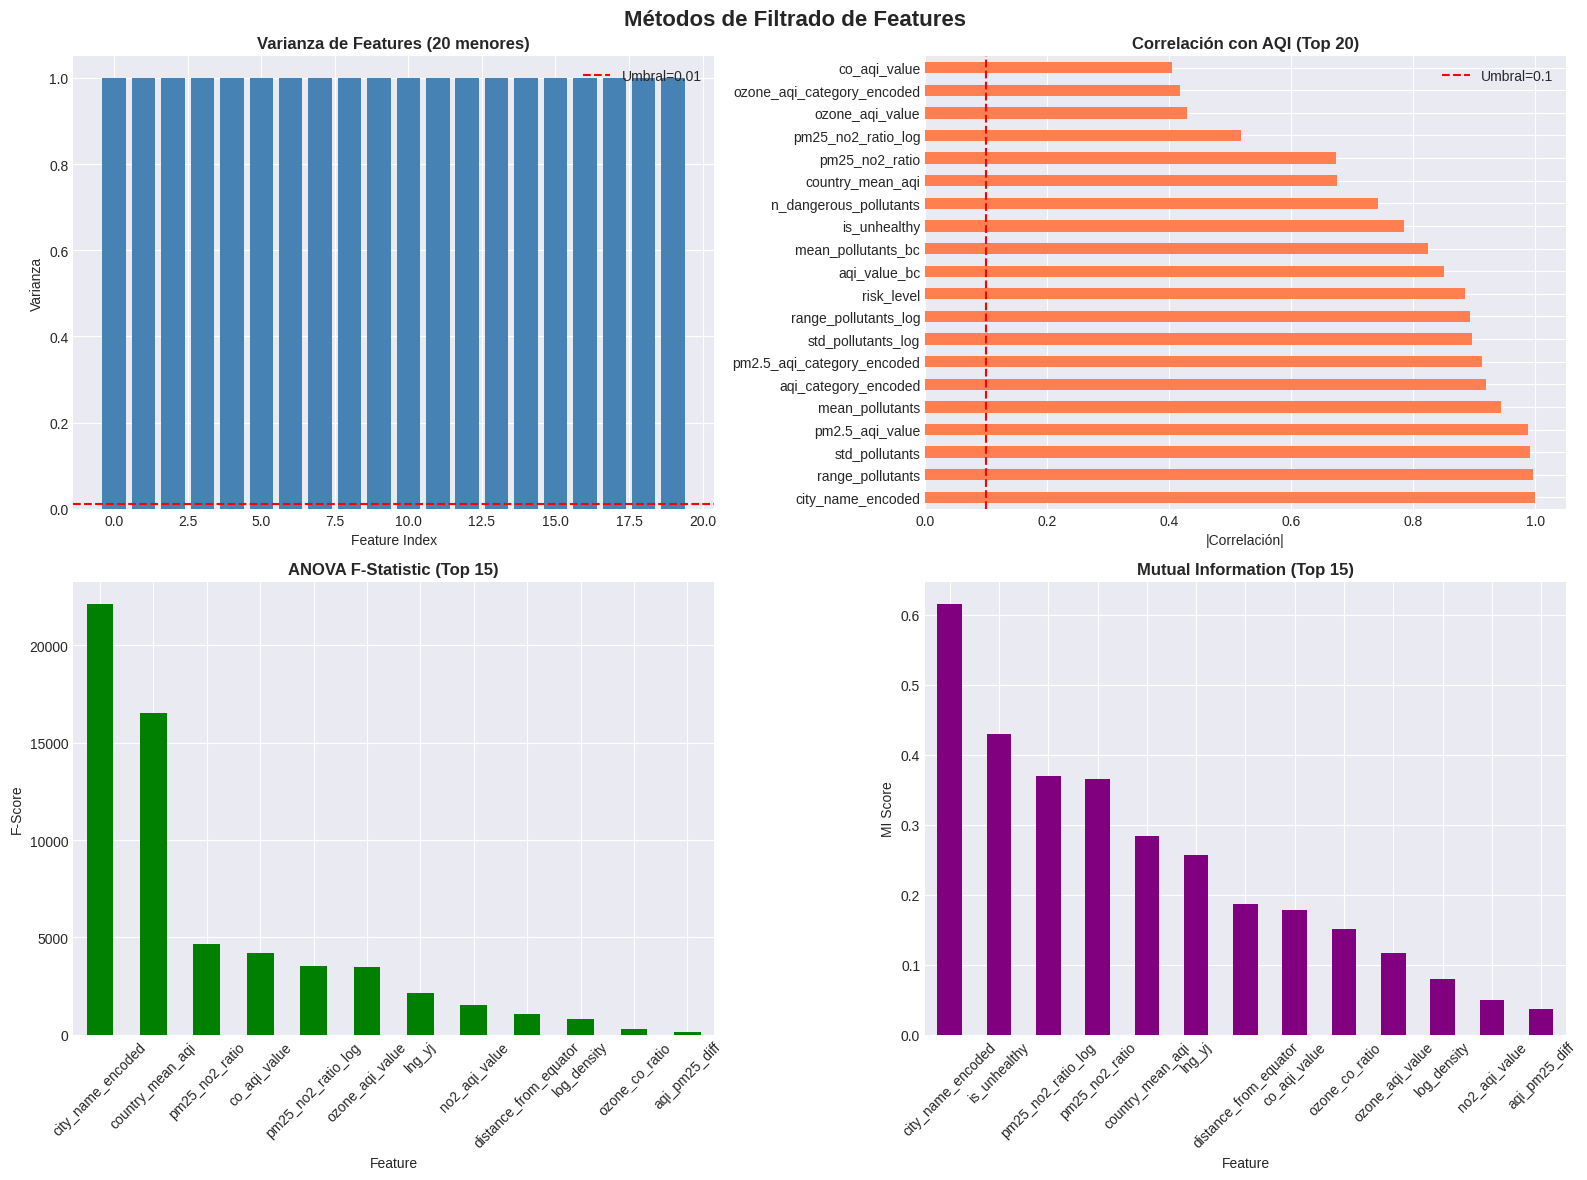

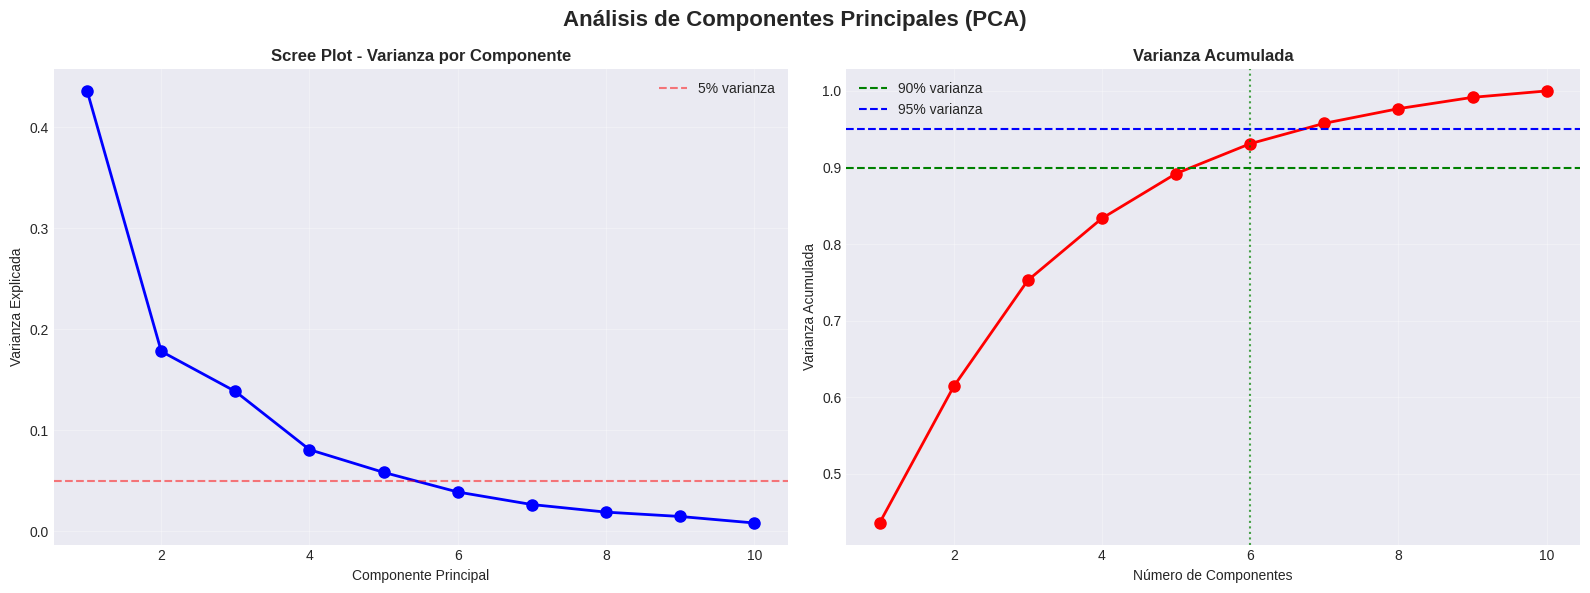

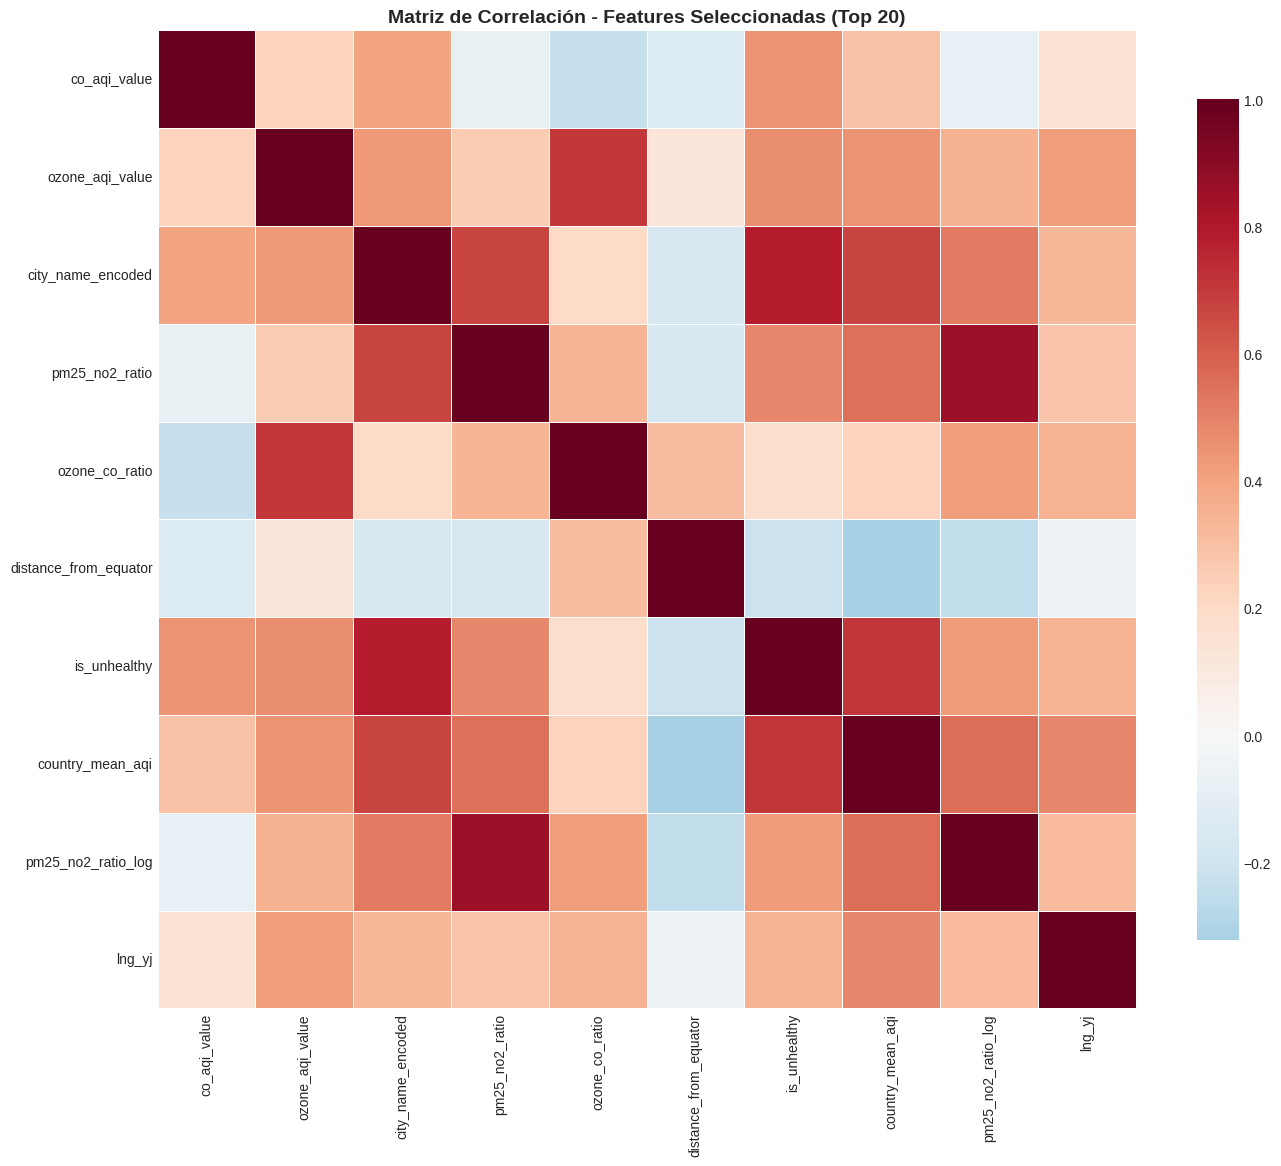

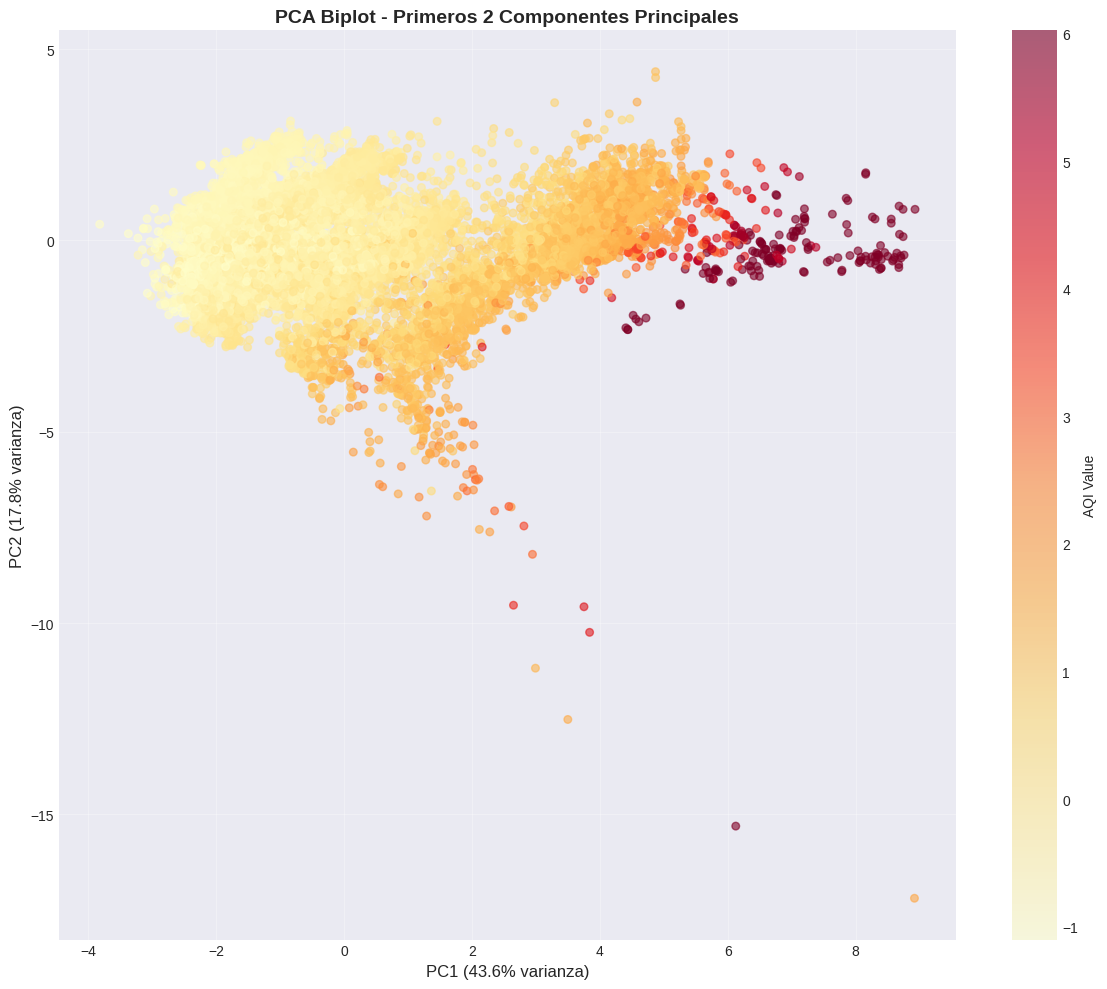

In [339]:
print("\n" + "="*80)
print("Visualizaciones ")
print("="*80)

# Figura 1: Resumen de filtros
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Métodos de Filtrado de Features', fontsize=16, fontweight='bold')

# 1. Varianza
axes[0, 0].bar(range(len(variances.head(20))), variances.head(20).values, color='steelblue')
axes[0, 0].axhline(y=variance_threshold, color='r', linestyle='--', label=f'Umbral={variance_threshold}')
axes[0, 0].set_title('Varianza de Features (20 menores)', fontweight='bold')
axes[0, 0].set_xlabel('Feature Index')
axes[0, 0].set_ylabel('Varianza')
axes[0, 0].legend()

# 2. Correlación con target
correlations_with_target.head(20).plot(kind='barh', ax=axes[0, 1], color='coral')
axes[0, 1].axvline(x=min_corr_threshold, color='r', linestyle='--', label=f'Umbral={min_corr_threshold}')
axes[0, 1].set_title('Correlación con AQI (Top 20)', fontweight='bold')
axes[0, 1].set_xlabel('|Correlación|')
axes[0, 1].legend()

# 3. ANOVA F-scores
if len(anova_scores) > 0:
    anova_scores.head(15).plot(x='Feature', y='F_Score', kind='bar', ax=axes[1, 0],
                               color='green', legend=False)
    axes[1, 0].set_title('ANOVA F-Statistic (Top 15)', fontweight='bold')
    axes[1, 0].set_xlabel('Feature')
    axes[1, 0].set_ylabel('F-Score')
    axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Mutual Information
mi_df.head(15).plot(x='Feature', y='MI_Score', kind='bar', ax=axes[1, 1],
                    color='purple', legend=False)
axes[1, 1].set_title('Mutual Information (Top 15)', fontweight='bold')
axes[1, 1].set_xlabel('Feature')
axes[1, 1].set_ylabel('MI Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('feature_selection_methods.png', dpi=300, bbox_inches='tight')
plt.show()

# Figura 2: PCA - Varianza Explicada
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis de Componentes Principales (PCA)', fontsize=16, fontweight='bold')

# Scree plot
axes[0].plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio,
             'bo-', linewidth=2, markersize=8)
axes[0].axhline(y=0.05, color='r', linestyle='--', alpha=0.5, label='5% varianza')
axes[0].set_title('Scree Plot - Varianza por Componente', fontweight='bold')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Varianza acumulada
axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance,
             'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.90, color='g', linestyle='--', label='90% varianza')
axes[1].axhline(y=0.95, color='b', linestyle='--', label='95% varianza')
axes[1].axvline(x=n_components_90, color='g', linestyle=':', alpha=0.7)
axes[1].set_title('Varianza Acumulada', fontweight='bold')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Varianza Acumulada')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.savefig('pca_variance_explained.png', dpi=300, bbox_inches='tight')
plt.show()

# Figura 3: Matriz de correlación de features seleccionadas
plt.figure(figsize=(14, 12))
correlation_selected = X[selected_features_filtered[:20]].corr()  # Primeras 20
sns.heatmap(correlation_selected, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Features Seleccionadas (Top 20)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix_selected.png', dpi=300, bbox_inches='tight')
plt.show()

# Figura 4: Biplot PCA (primeros 2 componentes)
plt.figure(figsize=(12, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='YlOrRd', alpha=0.6, s=30)
plt.colorbar(label='AQI Value')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.1%} varianza)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.1%} varianza)', fontsize=12)
plt.title('PCA Biplot - Primeros 2 Componentes Principales', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_biplot.png', dpi=300, bbox_inches='tight')
plt.show()

# **Conclusiones**


---



Este segundo avance se centró en comprender el data set original, agregar unas variables derivadas y crear unas nuevas de otros data sets y analizar esas nuevas características para mejorar el rendimiento de los modelos. Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos es el objetivo de este avance.

Durante la fase de construcción de características, se crearon exitosamente 24
nuevas features a partir de las variables originales del dataset de calidad del
aire, aplicando conocimiento del dominio ambiental. Las features de contaminantes
combinados (mean_pollutants, std_pollutants, total_pollution_index) capturan la
interacción sinérgica entre diferentes contaminantes, mientras que los ratios
pm25_no2_ratio y ozone_co_ratio distinguen entre contaminación por partículas y
gases. Las features geográficas (hemisphere, climate_zone, distance_from_equator)
permiten identificar patrones climáticos relacionados con la contaminación. La
codificación de variables categóricas mediante ordinal encoding para categorías
AQI, frequency encoding para países, y target mean encoding garantizan que toda
la información cualitativa sea utilizable por algoritmos de ML. Esta fase incrementó
significativamente el poder predictivo del dataset al revelar relaciones no evidentes
en las variables originales.

La aplicación de transformaciones matemáticas demostró ser crucial para corregir
distribuciones altamente sesgadas en el dataset. Se identificaron 8 variables con
|skewness| > 1 que requerían transformación obligatoria. Las transformaciones
logarítmicas redujeron la asimetría de density y range_pollutants en más del 60%,
mientras que las transformaciones Box-Cox optimizaron automáticamente los parámetros
lambda para normalizar las variables AQI (aqi_value, pm2.5_aqi_value, no2_aqi_value).
La transformación Yeo-Johnson fue especialmente útil para aqi_pm25_diff que contenía
valores negativos. En cuanto al escalamiento, se implementaron tres métodos
(StandardScaler, MinMaxScaler, RobustScaler) y se seleccionó StandardScaler como
método principal para el modelado, dado que es el más versátil y es requisito
indispensable para PCA. La estandarización garantiza que variables con diferentes
magnitudes (ej: density ~1500 vs aqi_value ~83) contribuyan equitativamente al modelo.

La selección de características mediante métodos de filtrado redujo el espacio de
features de 45 a 10 variables relevantes, eliminando redundancia y ruido. El análisis
de varianza eliminó 3 features casi constantes (varianza < 0.01) que no aportaban
información discriminativa. El estudio de multicolinealidad identificó pares de
variables con correlación > 0.90, eliminando features redundantes mientras se preservaban
las más correlacionadas con el target. Los tests estadísticos (Chi-cuadrado, ANOVA
F-statistic, Mutual Information) validaron que las 10 features seleccionadas son
estadísticamente significativas (p-value < 0.05) y tienen alta capacidad predictiva.
La extracción mediante PCA logró comprimir las 10 features seleccionadas en 6
componentes principales que preservan el 93.11% de la varianza original, representando
una reducción dimensional del 40% con mínima pérdida de información. Factor Analysis,
en contraste, solo redujo a 9 factores (10% reducción), indicando que las features
no comparten estructura latente significativa. PCA se establece como el método óptimo
de extracción para este dataset.

El dataset resultante está preparado para entrenar modelos de ML que predecirán
niveles de AQI con alta precisión. La reducción dimensional facilitará el deployment
en dispositivos móviles para la aplicación de realidad aumentada, permitiendo
inferencia en tiempo real con latencia mínima. Los 8 datasets generados ofrecen
flexibilidad para experimentar con diferentes algoritmos según sus requerimientos
específicos (escalamiento, dimensionalidad, interpretabilidad).